# Capstone Crime EDA

## Part 1: Data Wrangling/Cleaning

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [48]:
##os.chdir('/Users/hudsonfinchbatista/Desktop/Python Datasets/Capstone/Crimes by Block')
##dataframe1 = pd.read_csv('MC_Crime1.csv')
##dataframe2 = pd.read_csv('MC_Crime2.csv')
##dataframe3 = pd.read_csv('MC_Crime3.csv')
##dataframe4 = pd.read_csv('MC_Crime4.csv')
##dataframe5 = pd.read_csv('MC_Crime5.csv')
##dataframe6 = pd.read_csv('MC_Crime6.csv')
##dataframe7 = pd.read_csv('MC_Crime7.csv')
##dataframe8 = pd.read_csv('MC_Crime8.csv')
##dataframe9 = pd.read_csv('MC_Crime9.csv')
##dataframe10 = pd.read_csv('MC_Crime10.csv')
##dataframe11 = pd.read_csv('MC_Crime11.csv')
##dataframe12 = pd.read_csv('MC_Crime12.csv')

In [49]:
##dataframe = pd.concat([dataframe1,dataframe2,dataframe3,dataframe4,dataframe5,dataframe6,
                      ##dataframe7,dataframe8,dataframe9,dataframe10,dataframe11,dataframe12],axis=0)
##dataframe.head()

In [50]:
len(dataframe)

237000

In [51]:
for column in dataframe.columns:
    print(column)

Unnamed: 0
Address Number
Age
Agency
Bachelors
Beat
Block
Block Address
CR Number
City
Crime Name1
Crime Name2
Crime Name3
Dispatch Date / Time
Educational Attainment
End_Date_Time
High School
Incident ID
Income
Latitude
Location
Longitude
Means of Transportation
NIBRS Code
Offence Code
PRA
Place
Police District Name
Police District Number
Pop
Public Transportation
Sector
Start_Date_Time
State
Street Name
Street Prefix
Street Suffix
Street Type
Total Laborforce
Total Unemployed
Unnamed: 0.1
Victims
Zip Code


In [52]:
# Remove two Unnamed columns

dataframe2 = dataframe[dataframe.columns[~dataframe.columns.isin(['Unnamed: 0','Unnamed: 0.1'])]]

In [53]:
# Remove data for which block equals -999 (i.e. no block found for lat, lon of given crime)

dataframe2 = dataframe2[~(dataframe2['Block'] ==  -999)]

In [54]:
len(dataframe2)

236329

In [55]:
dataframe2.head()

Address Number  Age Agency  Bachelors Beat  Block          Block Address  \
30          5200.0  NaN   MCPD        NaN  2E1  10011  5200 BLK  WESTERN AVE   
31          2700.0  NaN   MCPD        NaN  2D1  15001    2700 BLK  DANIEL RD   
32          7800.0  NaN   MCPD        NaN  3G1  16001  7800 BLK  EASTERN AVE   
33          7800.0  NaN   MCPD        NaN  3G1  16001  7800 BLK  EASTERN AVE   
34             NaN  NaN   MCPD        NaN  3G1  16001                    NaN   

    CR Number         City             Crime Name1  ...  \
30  200033519  CHEVY CHASE  Crime Against Property  ...   
31  200009191  CHEVY CHASE  Crime Against Property  ...   
32  200012114          NaN   Crime Against Society  ...   
33  200012114          NaN   Crime Against Society  ...   
34  190048498          NaN                   Other  ...   

           Start_Date_Time State Street Name  Street Prefix Street Suffix  \
30  08/27/2020 12:00:00 PM    MD     WESTERN            NaN           NaN   
31  02/23/2020 06:00:00 PM    MD      DANIEL            NaN           NaN   
32  03/11/2020 10:10:00 PM    MD     EASTERN            NaN           NaN   
33  03/11/2020 10:10:00 PM    MD     EASTERN            NaN           NaN   
34  10/09/2019 03:00:00 PM    MD     GEORGIA            NaN           NaN   

    Street Type  Total Laborforce  Total Unemployed  Victims Zip Code  
30          AVE               NaN               NaN        1  20815.0  
31           RD               NaN               NaN        1  20815.0  
32          AVE               NaN               NaN        1  20910.0  
33          AVE               NaN               NaN        1  20910.0  
34          AVE               NaN               NaN        1  20910.0  

[5 rows x 41 columns]

In [56]:
dataframe2['Age'].isnull().sum()

483

In [57]:
dataframe2['Pop'].isnull().sum()

483

In [58]:
# Exclude null values from Age column
dataframe2 = dataframe2[~dataframe2['Age'].isnull()]

In [59]:
dataframe2['Age'].isnull().sum()

0

In [60]:
dataframe2['Crime Name1'].value_counts()

Crime Against Property    103971
Crime Against Society      59501
Other                      47455
Crime Against Person       21934
Not a Crime                 2820
Name: Crime Name1, dtype: int64

In [61]:
# Take subset of dataset 

dataframe3 = dataframe2[['Incident ID','City','Police District Name','Block','Crime Name1','Crime Name2',
                         'Crime Name3','Victims','Place','Pop','Income','Age','Educational Attainment',
                         'Bachelors','High School','Means of Transportation','Public Transportation',
                         'Total Laborforce', 'Total Unemployed','Dispatch Date / Time','Start_Date_Time',
                         'End_Date_Time','Location','Longitude','Latitude']]
dataframe3.head()

Incident ID          City Police District Name    Block  \
50    201268391  GAITHERSBURG           GERMANTOWN  7001011   
51    201234989  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
52    201281727  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
53    201265326  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
54    201090622  GAITHERSBURG           GERMANTOWN  7001011   

             Crime Name1         Crime Name2             Crime Name3  Victims  \
50                 Other  All Other Offenses      POLICE INFORMATION        1   
51  Crime Against Person            Fondling  SEX OFFENSE - FONDLING        1   
52                 Other  All Other Offenses      POLICE INFORMATION        1   
53                 Other  All Other Offenses      POLICE INFORMATION        1   
54                 Other  All Other Offenses      POLICE INFORMATION        1   

                        Place     Pop  ...  Means of Transportation  \
50  Residence - Single Family  1922.0  ...                   1030.0   
51  Residence - Single Family  1922.0  ...                   1030.0   
52           Residence - Yard  1922.0  ...                   1030.0   
53  Residence - Single Family  1922.0  ...                   1030.0   
54             Street - Other  1922.0  ...                   1030.0   

    Public Transportation  Total Laborforce  Total Unemployed  \
50                   51.0            1067.0              31.0   
51                   51.0            1067.0              31.0   
52                   51.0            1067.0              31.0   
53                   51.0            1067.0              31.0   
54                   51.0            1067.0              31.0   

      Dispatch Date / Time         Start_Date_Time           End_Date_Time  \
50                     NaN  12/06/2019 09:16:00 PM                     NaN   
51                     NaN  04/13/2019 02:00:00 AM  04/13/2019 07:45:00 AM   
52  03/13/2020 09:09:38 AM  03/13/2020 09:09:00 AM                     NaN   
53  11/15/2019 04:33:36 PM  11/15/2019 04:33:00 PM                     NaN   
54                     NaN  07/22/2016 10:27:00 PM                     NaN   

               Location  Longitude   Latitude  
50  (39.2006, -77.1996) -77.199620  39.200626  
51  (39.1977, -77.1997) -77.199669  39.197675  
52  (39.2081, -77.1748) -77.174806  39.208137  
53  (39.2025, -77.1848) -77.184766  39.202456  
54   (39.205, -77.1643) -77.164342  39.204973  

[5 rows x 25 columns]

In [62]:
dataframe3['Crime Name1'].value_counts()

Crime Against Property    103971
Crime Against Society      59501
Other                      47455
Crime Against Person       21934
Not a Crime                 2820
Name: Crime Name1, dtype: int64

In [63]:
dataframe3['City'].value_counts()

SILVER SPRING         82571
GAITHERSBURG          34061
ROCKVILLE             32987
GERMANTOWN            23165
BETHESDA              15914
MONTGOMERY VILLAGE     7473
TAKOMA PARK            6075
POTOMAC                4793
CHEVY CHASE            4757
DERWOOD                4214
KENSINGTON             3798
OLNEY                  3649
BURTONSVILLE           2900
CLARKSBURG             2331
DAMASCUS               1901
BOYDS                  1646
BROOKEVILLE             693
POOLESVILLE             671
ASHTON                  318
SANDY SPRING            294
DICKERSON               221
CABIN JOHN              175
SPENCERVILLE            108
GLEN ECHO                68
MOUNT AIRY               65
BRINKLOW                 60
BARNESVILLE              38
BEALLSVILLE              33
LAUREL                   27
WOODBINE                  7
BELTSVILLE                3
HIGHLAND                  2
Name: City, dtype: int64

In [64]:
dataframe3['Police District Name'].value_counts()

SILVER SPRING          49997
WHEATON                45617
MONTGOMERY VILLAGE     40188
ROCKVILLE              32396
BETHESDA               31978
GERMANTOWN             30117
CITY OF TAKOMA PARK     5549
TAKOMA PARK                3
OTHER                      1
Name: Police District Name, dtype: int64

In [65]:
dataframe3['Income'].value_counts()

71360.0     8754
72817.0     6194
250001.0    6023
96528.0     4455
76488.0     3398
            ... 
119653.0      47
35817.0       41
57560.0       28
47870.0       12
59375.0        6
Name: Income, Length: 562, dtype: int64

In [66]:
dataframe3['Dispatch Date / Time'].isnull().sum()

47939

In [67]:
dataframe3['End_Date_Time'].isnull().sum()

122167

In [68]:
# Exlcude Time Variables due to sheer number of missing values

dataframe3 = dataframe3[dataframe3.columns[~dataframe3.columns.isin(['Dispatch Date / Time','End_Date_Time'])]]

In [69]:
dataframe3.head()

Incident ID          City Police District Name    Block  \
50    201268391  GAITHERSBURG           GERMANTOWN  7001011   
51    201234989  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
52    201281727  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
53    201265326  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
54    201090622  GAITHERSBURG           GERMANTOWN  7001011   

             Crime Name1         Crime Name2             Crime Name3  Victims  \
50                 Other  All Other Offenses      POLICE INFORMATION        1   
51  Crime Against Person            Fondling  SEX OFFENSE - FONDLING        1   
52                 Other  All Other Offenses      POLICE INFORMATION        1   
53                 Other  All Other Offenses      POLICE INFORMATION        1   
54                 Other  All Other Offenses      POLICE INFORMATION        1   

                        Place     Pop  ...  Bachelors  High School  \
50  Residence - Single Family  1922.0  ...      355.0        110.0   
51  Residence - Single Family  1922.0  ...      355.0        110.0   
52           Residence - Yard  1922.0  ...      355.0        110.0   
53  Residence - Single Family  1922.0  ...      355.0        110.0   
54             Street - Other  1922.0  ...      355.0        110.0   

    Means of Transportation  Public Transportation  Total Laborforce  \
50                   1030.0                   51.0            1067.0   
51                   1030.0                   51.0            1067.0   
52                   1030.0                   51.0            1067.0   
53                   1030.0                   51.0            1067.0   
54                   1030.0                   51.0            1067.0   

    Total Unemployed         Start_Date_Time             Location  Longitude  \
50              31.0  12/06/2019 09:16:00 PM  (39.2006, -77.1996) -77.199620   
51              31.0  04/13/2019 02:00:00 AM  (39.1977, -77.1997) -77.199669   
52              31.0  03/13/2020 09:09:00 AM  (39.2081, -77.1748) -77.174806   
53              31.0  11/15/2019 04:33:00 PM  (39.2025, -77.1848) -77.184766   
54              31.0  07/22/2016 10:27:00 PM   (39.205, -77.1643) -77.164342   

     Latitude  
50  39.200626  
51  39.197675  
52  39.208137  
53  39.202456  
54  39.204973  

[5 rows x 23 columns]

In [70]:
dataframe4 = dataframe3

In [72]:
dataframe5 = dataframe4

In [73]:
# Exclude all values for which Educational Attainment equals 0
dataframe5 = dataframe4[dataframe4['Educational Attainment'] != 0]


In [74]:
# Find percentages of individuals that are unemployed, use public transportation, have at most a bachelors degree, and
# have at most a high school degree for each block for each crime observation

dataframe5['High School %'] = dataframe5.apply(lambda x: x['High School']/x['Educational Attainment'],axis = 1)
dataframe5['Bachelors %'] = dataframe5.apply(lambda x: x['Bachelors']/x['Educational Attainment'],axis = 1)
dataframe5['Public Transportation %'] = dataframe5.apply(lambda x: x['Public Transportation']/x['Means of Transportation'], axis = 1)
dataframe5['Unemployed %'] = dataframe5.apply(lambda x: x['Total Unemployed']/x['Total Laborforce'], axis = 1)



<ipython-input-74-1a6714184fda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe5['High School %'] = dataframe5.apply(lambda x: x['High School']/x['Educational Attainment'],axis = 1)
<ipython-input-74-1a6714184fda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe5['Bachelors %'] = dataframe5.apply(lambda x: x['Bachelors']/x['Educational Attainment'],axis = 1)
<ipython-input-74-1a6714184fda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [75]:
dataframe5.head()

Incident ID          City Police District Name    Block  \
50    201268391  GAITHERSBURG           GERMANTOWN  7001011   
51    201234989  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
52    201281727  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
53    201265326  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
54    201090622  GAITHERSBURG           GERMANTOWN  7001011   

             Crime Name1         Crime Name2             Crime Name3  Victims  \
50                 Other  All Other Offenses      POLICE INFORMATION        1   
51  Crime Against Person            Fondling  SEX OFFENSE - FONDLING        1   
52                 Other  All Other Offenses      POLICE INFORMATION        1   
53                 Other  All Other Offenses      POLICE INFORMATION        1   
54                 Other  All Other Offenses      POLICE INFORMATION        1   

                        Place     Pop  ...  Total Laborforce  \
50  Residence - Single Family  1922.0  ...            1067.0   
51  Residence - Single Family  1922.0  ...            1067.0   
52           Residence - Yard  1922.0  ...            1067.0   
53  Residence - Single Family  1922.0  ...            1067.0   
54             Street - Other  1922.0  ...            1067.0   

    Total Unemployed         Start_Date_Time             Location  Longitude  \
50              31.0  12/06/2019 09:16:00 PM  (39.2006, -77.1996) -77.199620   
51              31.0  04/13/2019 02:00:00 AM  (39.1977, -77.1997) -77.199669   
52              31.0  03/13/2020 09:09:00 AM  (39.2081, -77.1748) -77.174806   
53              31.0  11/15/2019 04:33:00 PM  (39.2025, -77.1848) -77.184766   
54              31.0  07/22/2016 10:27:00 PM   (39.205, -77.1643) -77.164342   

     Latitude  High School %  Bachelors %  Public Transportation %  \
50  39.200626       0.083714     0.270167                 0.049515   
51  39.197675       0.083714     0.270167                 0.049515   
52  39.208137       0.083714     0.270167                 0.049515   
53  39.202456       0.083714     0.270167                 0.049515   
54  39.204973       0.083714     0.270167                 0.049515   

   Unemployed %  
50     0.029053  
51     0.029053  
52     0.029053  
53     0.029053  
54     0.029053  

[5 rows x 27 columns]

In [76]:
# Exclude observations where income is not greater than 0
dataframe5 = dataframe5[dataframe5['Income'] > 0]

In [77]:
len(dataframe5)

235368

In [78]:
dataframe5['Income'].value_counts()

71360.0     8754
72817.0     6194
250001.0    6023
96528.0     4455
76488.0     3398
            ... 
119653.0      47
35817.0       41
57560.0       28
47870.0       12
59375.0        6
Name: Income, Length: 561, dtype: int64

In [79]:
dataframe5['Age'].value_counts()

31.3    9375
35.1    7745
33.8    5959
36.0    4486
33.4    3835
        ... 
57.5      49
72.6      41
80.4      28
77.1      12
86.5       6
Name: Age, Length: 257, dtype: int64

In [80]:
crime_type = dataframe5['Crime Name1'].value_counts()

crime_type.head()

Crime Against Property    103669
Crime Against Society      59437
Other                      47376
Crime Against Person       21904
Not a Crime                 2817
Name: Crime Name1, dtype: int64

## Part 2: EDA

### Analysis of Data Montgomery Crimes Dataset Variables

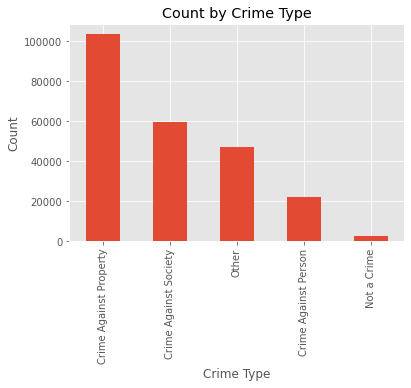

<Figure size 72x72 with 0 Axes>

In [81]:
crime_type.plot(kind = 'bar', title = 'Count by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.figure(num= None, figsize=(1,1))
plt.show()

In [82]:
crime_type2 = dataframe5['Crime Name2'].value_counts()
crime_type2

All Other Offenses                             54639
Drug/Narcotic Violations                       21011
Theft From Motor Vehicle                       20699
Simple Assault                                 15516
Destruction/Damage/Vandalism of Property       14288
Driving Under the Influence                    12346
Shoplifting                                    12145
All other Larceny                              10698
Theft from Building                             8815
Burglary/Breaking and Entering                  6798
Liquor Law Violations                           6257
Identity Theft                                  4896
False Pretenses/Swindle/Confidence Game         4622
Disorderly Conduct                              4492
Motor Vehicle Theft                             4386
Theft of Motor Vehicle Parts or Accessories     4057
Trespass of Real Property                       3378
Credit Card/Automatic Teller Machine Fraud      3358
Aggravated Assault                            

In [83]:
crime_type2 = pd.DataFrame(crime_type2)
crime_type2 = crime_type2[crime_type2['Crime Name2'] > 5000]
crime_type2

Crime Name2
All Other Offenses                              54639
Drug/Narcotic Violations                        21011
Theft From Motor Vehicle                        20699
Simple Assault                                  15516
Destruction/Damage/Vandalism of Property        14288
Driving Under the Influence                     12346
Shoplifting                                     12145
All other Larceny                               10698
Theft from Building                              8815
Burglary/Breaking and Entering                   6798
Liquor Law Violations                            6257

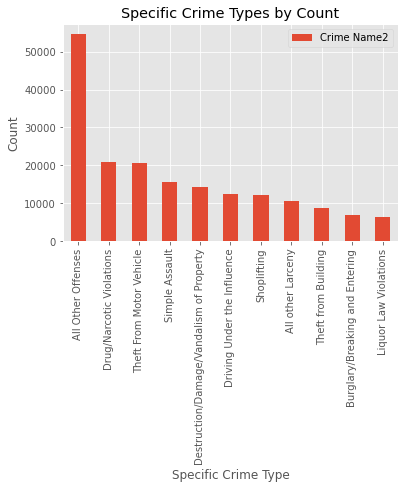

In [84]:
crime_type2.plot(kind='bar', title = 'Specific Crime Types by Count')
plt.xlabel('Specific Crime Type')
plt.ylabel('Count')
plt.show()

In [85]:
district_count = dataframe5['Police District Name'].value_counts()

district_count.head()

SILVER SPRING         49991
WHEATON               45616
MONTGOMERY VILLAGE    40188
ROCKVILLE             32255
BETHESDA              31939
Name: Police District Name, dtype: int64

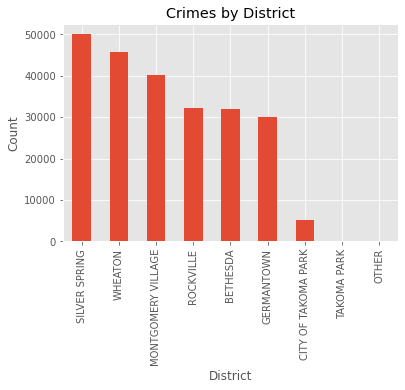

In [86]:
district_count.plot(kind = 'bar', title = 'Crimes by District')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()

In [87]:
city_count = dataframe5['City'].value_counts()

city_count.head()

SILVER SPRING    82571
GAITHERSBURG     34061
ROCKVILLE        32806
GERMANTOWN       23165
BETHESDA         15914
Name: City, dtype: int64

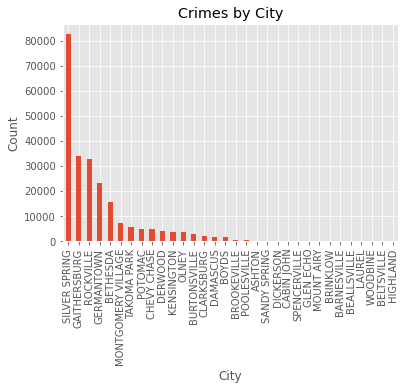

In [88]:
city_count.plot(kind = 'bar', title = 'Crimes by City')
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

In [89]:
place_count = dataframe5['Place'].value_counts()

place_count = pd.DataFrame(place_count)
place_count

Place
Street - In vehicle          28634
Residence - Single Family    24919
Residence - Apartment/Condo  21224
Other/Unknown                17582
Street - Residential         15730
...                            ...
Pawn Shop                       48
Lake/Waterway                   38
Retail - Video Store            33
Nursery                         28
Pedestrian Tunnel                9

[83 rows x 1 columns]

In [90]:
place_count = place_count[place_count['Place'] > 5000]
place_count

Place
Street - In vehicle                 28634
Residence - Single Family           24919
Residence - Apartment/Condo         21224
Other/Unknown                       17582
Street - Residential                15730
Parking Lot - Residential           11641
Residence -Townhouse/Duplex         10809
Residence - Driveway                 8705
Parking Lot - Commercial             8489
School/College                       6182
Retail - Department/Discount Store   6168
Street - Commercial                  6062

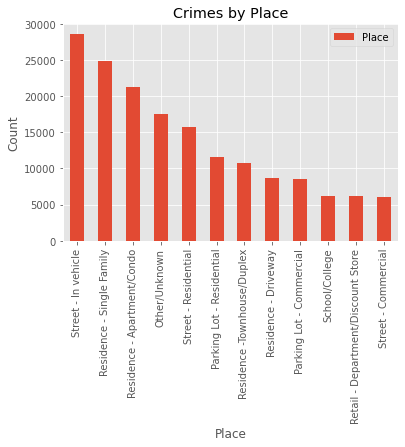

In [91]:
place_count.plot(kind='bar',title = 'Crimes by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

In [92]:
crimes_districts = dataframe5.groupby(['Crime Name1','Police District Name']).size().reset_index(name = 'Count')
crimes_districts = pd.DataFrame(crimes_districts)
crimes_districts.head()

Crime Name1 Police District Name  Count
0  Crime Against Person             BETHESDA   2108
1  Crime Against Person  CITY OF TAKOMA PARK    426
2  Crime Against Person           GERMANTOWN   3735
3  Crime Against Person   MONTGOMERY VILLAGE   4616
4  Crime Against Person            ROCKVILLE   2498

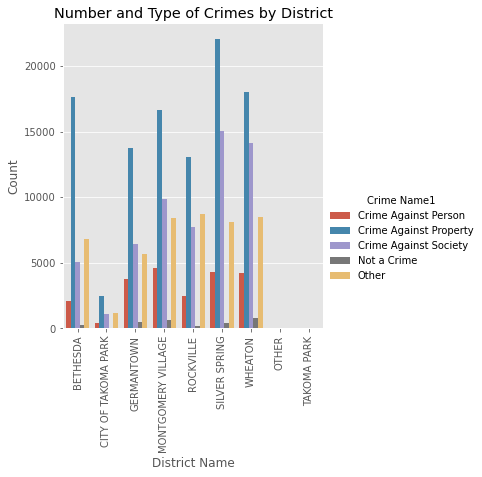

In [93]:
sns.catplot(x = 'Police District Name', y='Count', 
            hue = 'Crime Name1',data=crimes_districts, 
            kind='bar')

plt.title('Number and Type of Crimes by District')
plt.ylabel('Count')
plt.xlabel('District Name')
plt.xticks(rotation=90)

plt.show()

In [94]:
crimes_places = dataframe5.groupby(['Crime Name1','Place']).size().reset_index(name = 'Count')
crimes_places = pd.DataFrame(crimes_places)
crimes_places.head()

Crime Name1                         Place  Count
0  Crime Against Person  Air/Bus/Train/Metro Terminal     75
1  Crime Against Person               Auto Dealership     18
2  Crime Against Person                   Auto Repair     20
3  Crime Against Person                    Bank - ATM     24
4  Crime Against Person         Bank/S&L/Credit Union     12

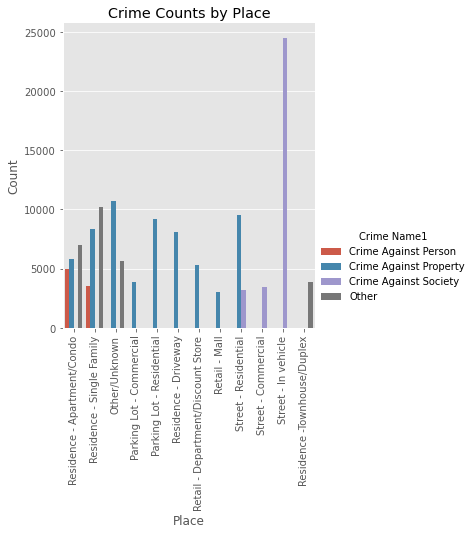

In [95]:
crimes_places1 = crimes_places[crimes_places['Count']>=3000]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name1',kind = 'bar', data = crimes_places1)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

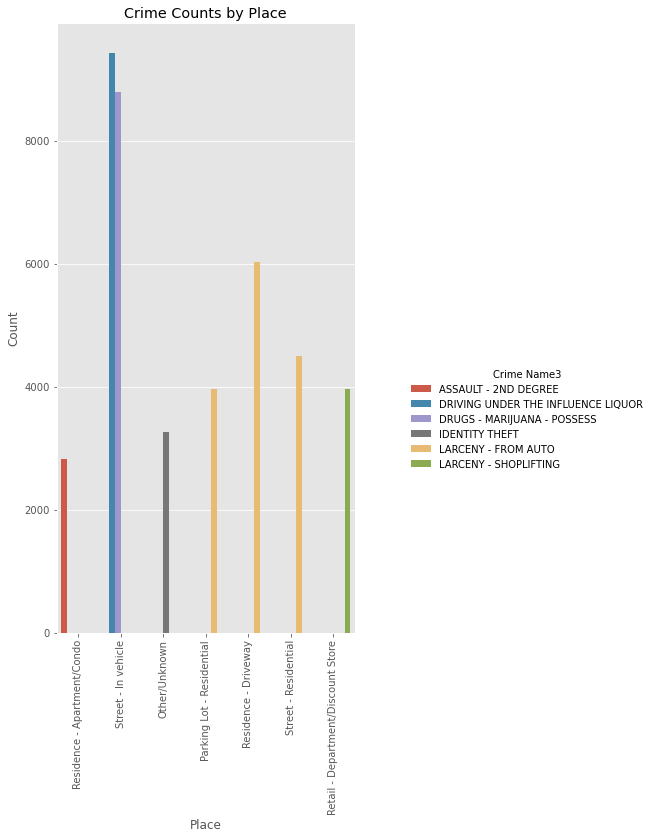

In [265]:
data_no_other = dataframe5[dataframe5['Crime Name1'] != 'Other']

crimes_places3 = data_no_other.groupby(['Crime Name3','Place']).size().reset_index(name = 'Count')
crimes_places3 = pd.DataFrame(crimes_places3)

crimes_places3 = crimes_places3[crimes_places3['Count']>2000]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places3)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

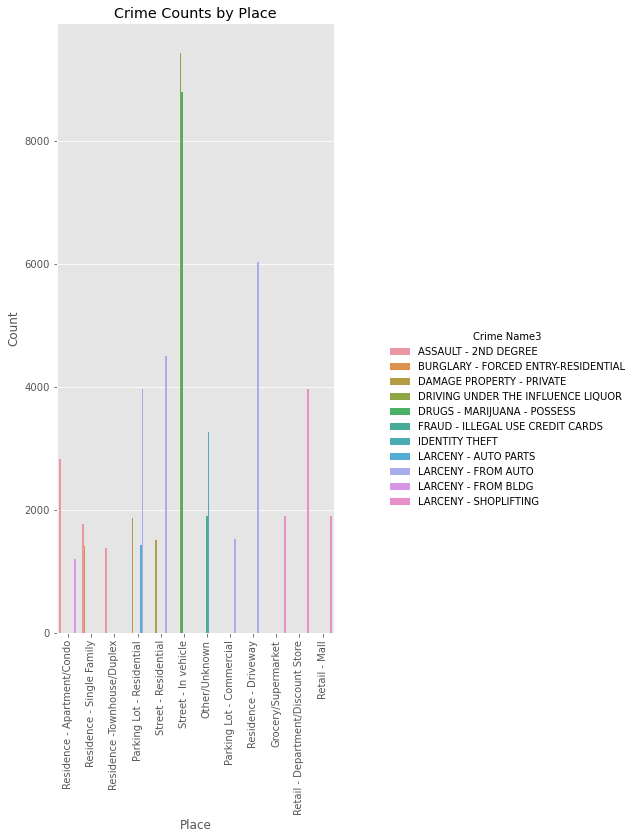

In [266]:
data_no_other = dataframe5[dataframe5['Crime Name1'] != 'Other']

crimes_places3 = data_no_other.groupby(['Crime Name3','Place']).size().reset_index(name = 'Count')
crimes_places3 = pd.DataFrame(crimes_places3)

crimes_places3 = crimes_places3[crimes_places3['Count']>1100]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places3)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

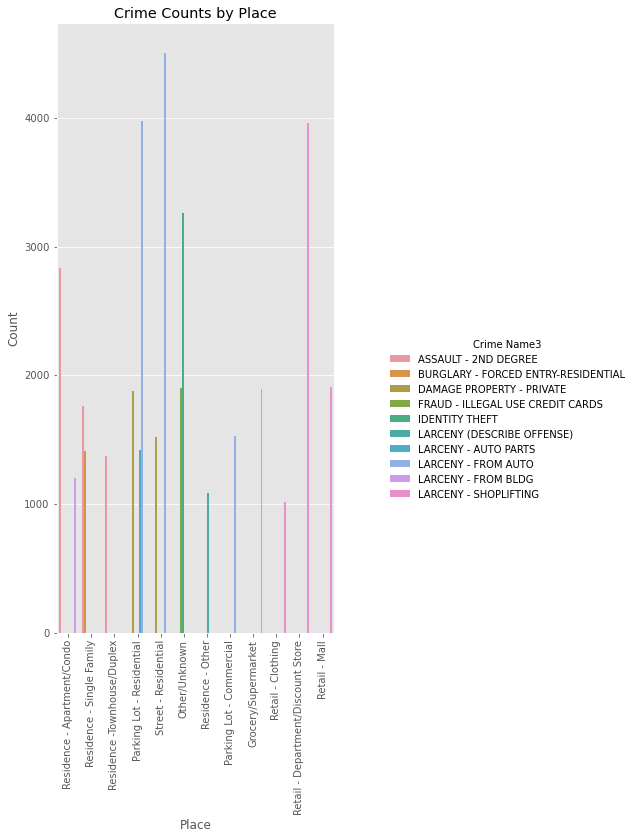

In [267]:
crimes_places3b = data_no_other.groupby(['Crime Name3','Place']).size().reset_index(name = 'Count')
crimes_places3b = pd.DataFrame(crimes_places3b)

crimes_places3b = crimes_places3b[(crimes_places3b['Count']>1000) & (crimes_places3b['Count']<6000)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places3b)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

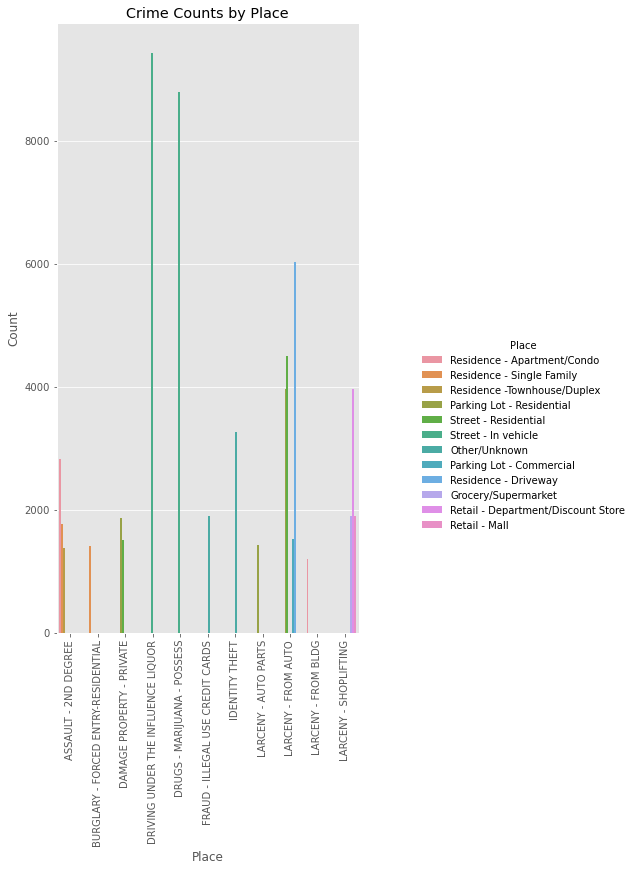

In [268]:
sns.catplot(x = 'Crime Name3', y = 'Count' , hue = 'Place',kind = 'bar', data = crimes_places3)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [155]:
len(data_no_other)

187992

In [166]:
crimes_places3.head()

Crime Name3                        Place  Count
195                  ASSAULT - 2ND DEGREE  Residence - Apartment/Condo   2834
202                  ASSAULT - 2ND DEGREE    Residence - Single Family   1762
204                  ASSAULT - 2ND DEGREE  Residence -Townhouse/Duplex   1375
904   BURGLARY - FORCED ENTRY-RESIDENTIAL    Residence - Single Family   1412
1384            DAMAGE PROPERTY - PRIVATE    Parking Lot - Residential   1875

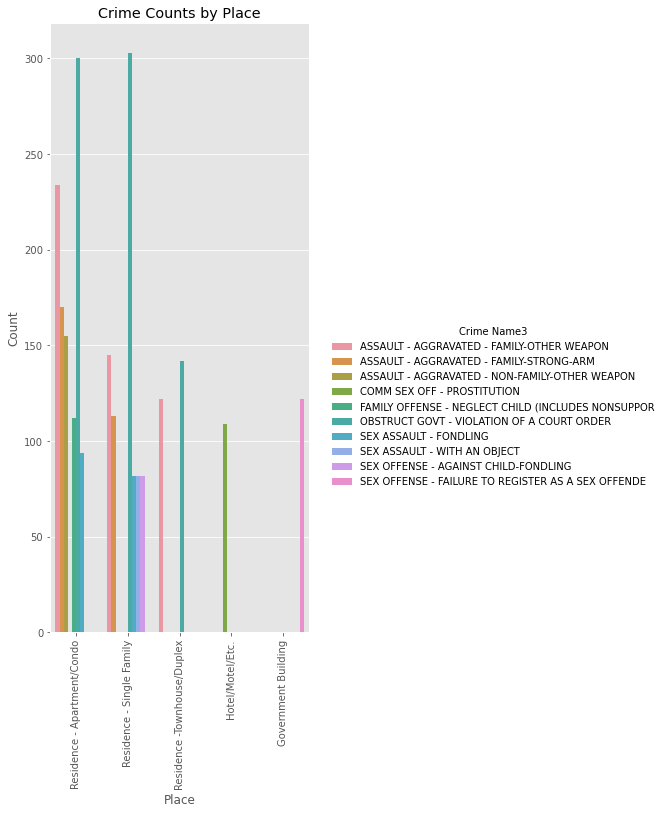

In [276]:
crimes_places = data_no_other.groupby(['Crime Name3','Place']).size().reset_index(name = 'Count')
crimes_places = pd.DataFrame(crimes_places)

crimes_places10 = crimes_places[((crimes_places['Crime Name3'].str.contains('SEX')) | 
                               (crimes_places['Crime Name3'].str.contains('FAMILY')) | 
                                (crimes_places['Crime Name3'].str.contains('OBSTRUCT GOVT'))) & 
                                (crimes_places['Count'] > 75)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places10)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

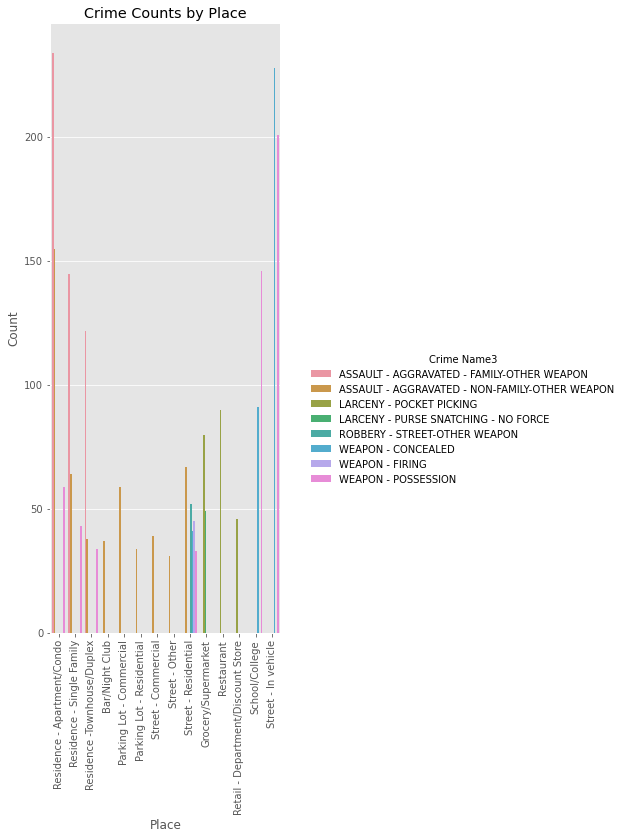

In [277]:
crimes_places11 = crimes_places[((crimes_places['Crime Name3'].str.contains('ROBERRY')) | 
                               (crimes_places['Crime Name3'].str.contains('WEAPON')) | 
                                (crimes_places['Crime Name3'].str.contains('POCKET')) |
                                (crimes_places['Crime Name3'].str.contains('SNATCHING'))) & 
                                (crimes_places['Count'] > 30)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places11)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

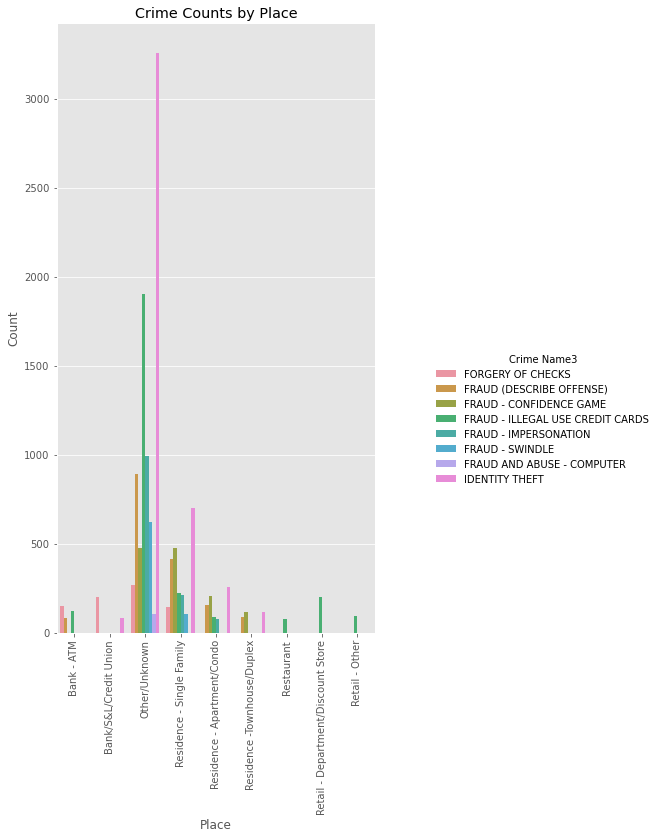

In [278]:
crimes_places12 = crimes_places[((crimes_places['Crime Name3'].str.contains('FRAUD')) | 
                                 (crimes_places['Crime Name3'].str.contains('IDENTITY')) |
                                 (crimes_places['Crime Name3'].str.contains('EMBEZZLE')) |
                                 (crimes_places['Crime Name3'].str.contains('FORGERY'))) & 
                                (crimes_places['Count'] > 75)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places12)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

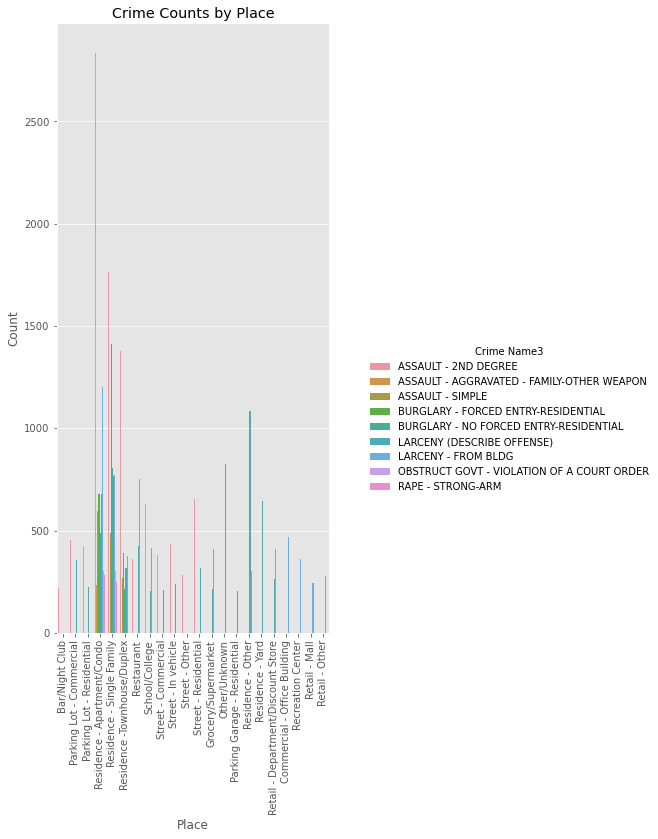

In [279]:
crimes_places15 = crimes_places[((crimes_places['Crime Name3'].str.contains('ASSAULT')) | 
                                 (crimes_places['Crime Name3'].str.contains('RAPE')) |
                                 (crimes_places['Crime Name3'].str.contains('BLDG')) |
                                 (crimes_places['Crime Name3'].str.contains('SEX')) |
                                (crimes_places['Crime Name3'].str.contains('FORCED')) | 
                                 (crimes_places['Crime Name3'].str.contains('LARCENY \(DESCRIBE OFFENSE\)')) |
                                 (crimes_places['Crime Name3'].str.contains('FAMILY')) |
                                 (crimes_places['Crime Name3'].str.contains('OBSTRUCT GOVT'))) & 
                                (crimes_places['Count'] > 200)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places15)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

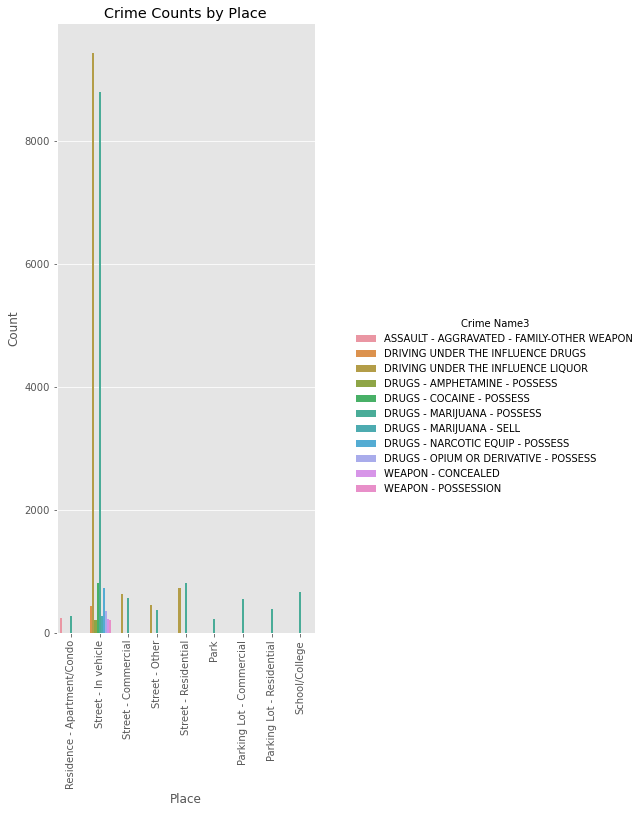

In [280]:
crimes_places14 = crimes_places[((crimes_places['Crime Name3'].str.contains('DRUGS')) | 
                               (crimes_places['Crime Name3'].str.contains('INFLUENCE')) | 
                                (crimes_places['Crime Name3'].str.contains('OBSTRUCT POLICE')) |
                                (crimes_places['Crime Name3'].str.contains('WEAPON'))) & 
                                (crimes_places['Count'] > 200)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places14)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

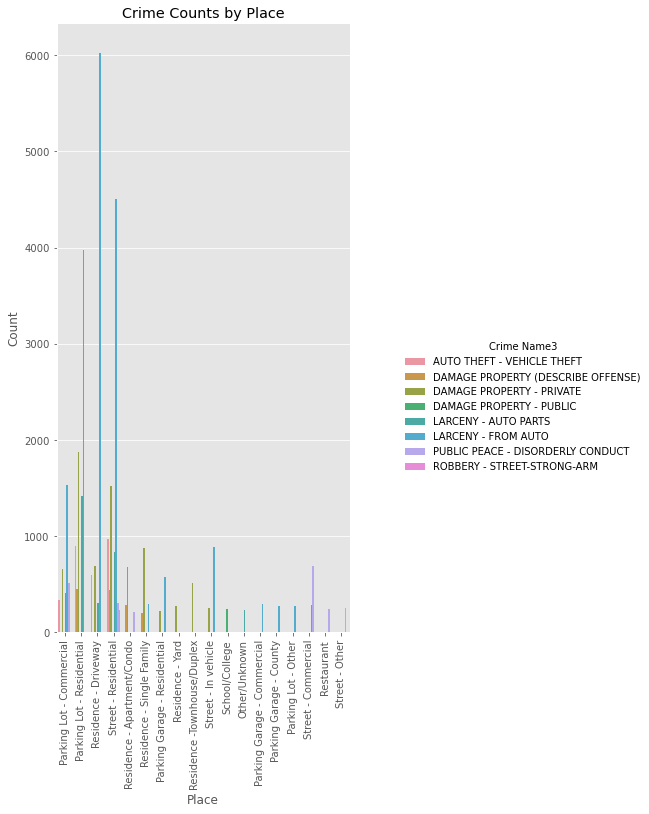

In [281]:
crimes_places15 = crimes_places[((crimes_places['Crime Name3'].str.contains('DAMAGE PROPERTY')) | 
                               (crimes_places['Crime Name3'].str.contains('AUTO')) | 
                                (crimes_places['Crime Name3'].str.contains('DISORDERLY CONDUCT')) |
                                (crimes_places['Crime Name3'].str.contains('ROBBERY'))) & 
                                (crimes_places['Count'] > 200)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places15)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

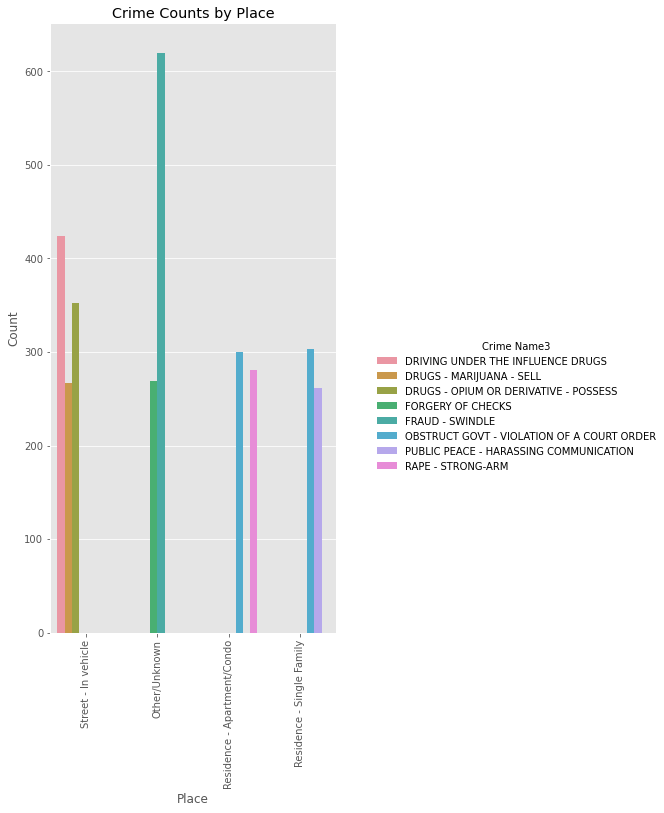

In [275]:
places_above_5000 = data_no_other['Place'].value_counts().loc[lambda x: x > 5000]
top_places = list(places_above_5000.index.values)
data_no_other2 = data_no_other[data_no_other['Place'].isin(top_places)]

crimes_below_1000 = data_no_other2['Crime Name3'].value_counts().loc[lambda x: (x < 1000) & (x > 300)]
bottom_crimes = list(crimes_below_1000.index.values)
crimes_places5 = data_no_other2[data_no_other2['Crime Name3'].isin(bottom_crimes)]

crimes_places5 = crimes_places5.groupby(['Crime Name3','Place']).size().reset_index(name='Count')
crimes_places5 = pd.DataFrame(crimes_places5)
crimes_places6 = crimes_places5[(crimes_places5['Count'] < 1000) & (crimes_places5['Count'] > 250)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places6)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

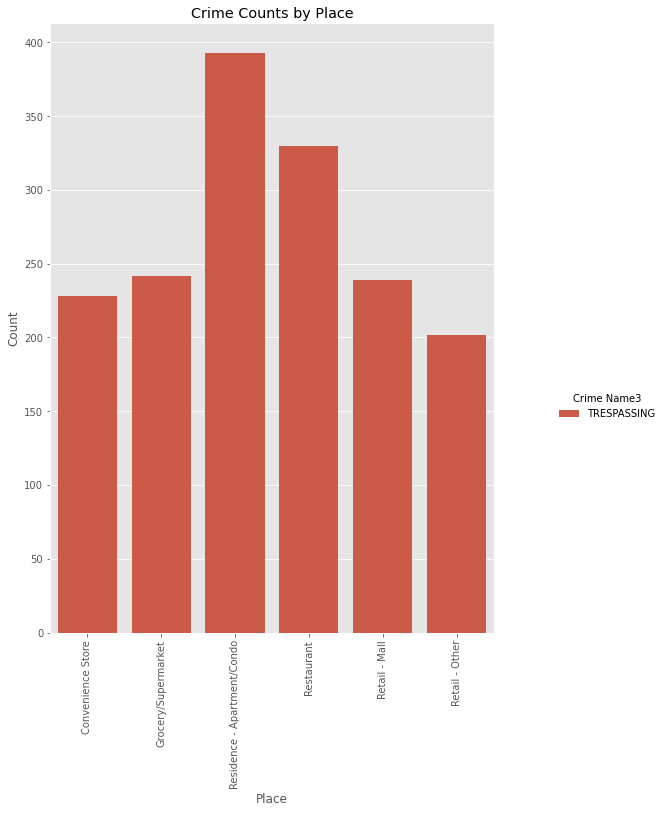

In [274]:
crimes_places8 = data_no_other.groupby(['Crime Name3','Place']).size().reset_index(name = 'Count')
crimes_places8 = pd.DataFrame(crimes_places8)

crimes_places8 = crimes_places8[(crimes_places8['Crime Name3'] == 'TRESPASSING') & (crimes_places8['Count']>200)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places8)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

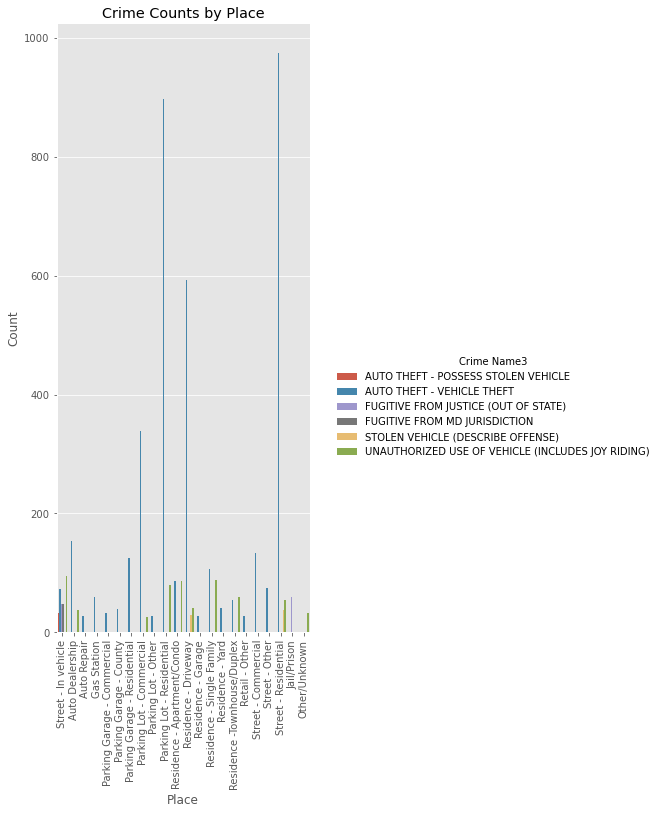

In [273]:
crimes_places16 = crimes_places[((crimes_places['Crime Name3'].str.contains('FUGITIVE')) | 
                               (crimes_places['Crime Name3'].str.contains('VEHICLE'))) & 
                                (crimes_places['Count'] > 25)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places16)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

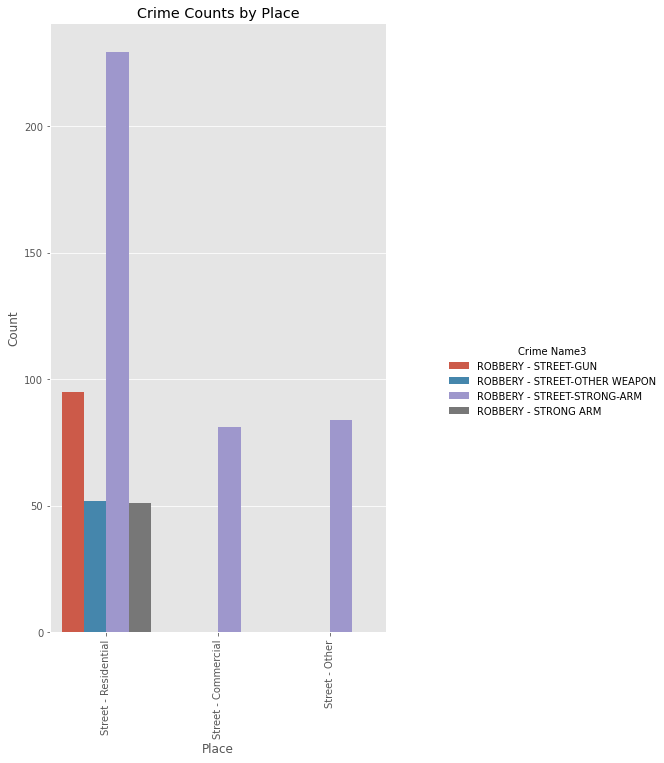

In [272]:
crimes_places13 = crimes_places[((crimes_places['Crime Name3'].str.contains('ROBBERY'))) & (crimes_places['Count'] > 50)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places13)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

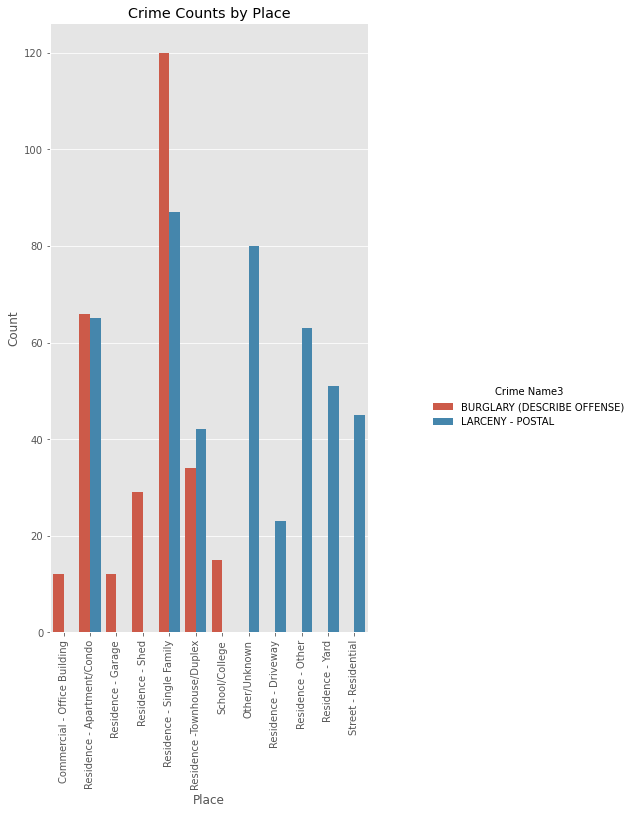

In [282]:
crimes_places17 = crimes_places[((crimes_places['Crime Name3'].str.contains('POSTAL')) | 
                               (crimes_places['Crime Name3'].str.contains('BURGLARY \(DESCRIBE OFFENSE\)'))) & 
                                (crimes_places['Count'] > 10)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places17)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

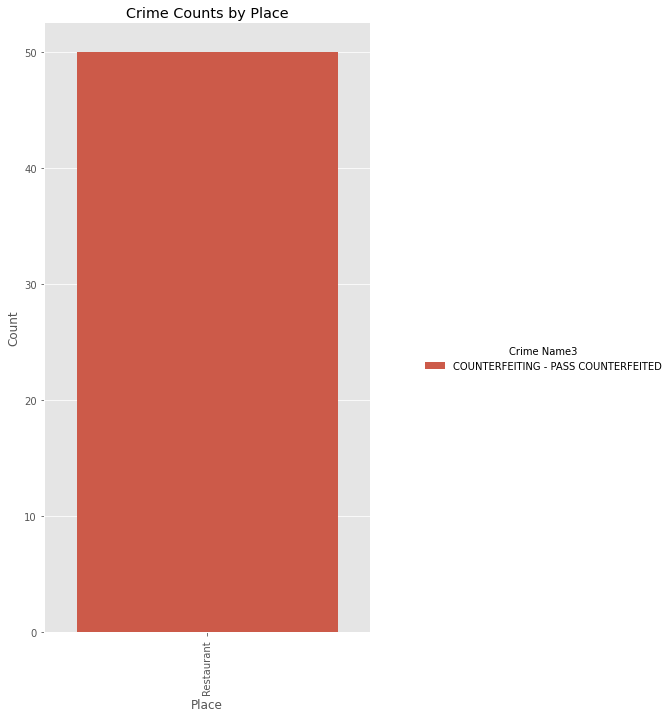

In [271]:
crimes_places14 = crimes_places[((crimes_places['Crime Name3'].str.contains('COUNTERFEIT'))) & (crimes_places['Count'] > 30)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places14)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

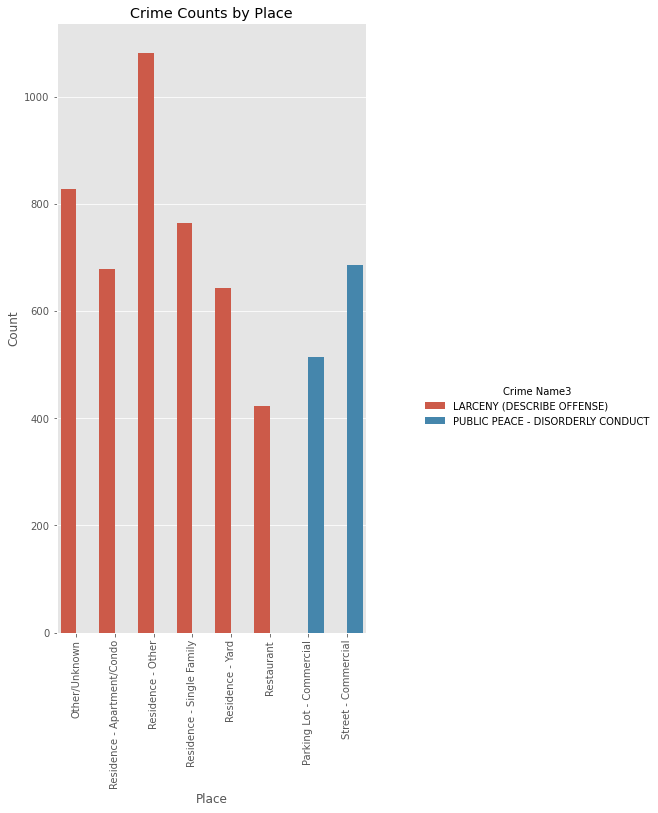

In [269]:
crimes_places4 = data_no_other.groupby(['Crime Name3','Place']).size().reset_index(name = 'Count')
crimes_places4 = pd.DataFrame(crimes_places4)

crimes_places4 = crimes_places4[((crimes_places4['Crime Name3'] == 'LARCENY (DESCRIBE OFFENSE)') | 
                               (crimes_places4['Crime Name3'] == 'PUBLIC PEACE - DISORDERLY CONDUCT')) & 
                                (crimes_places4['Count'] > 400)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places4)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

[]

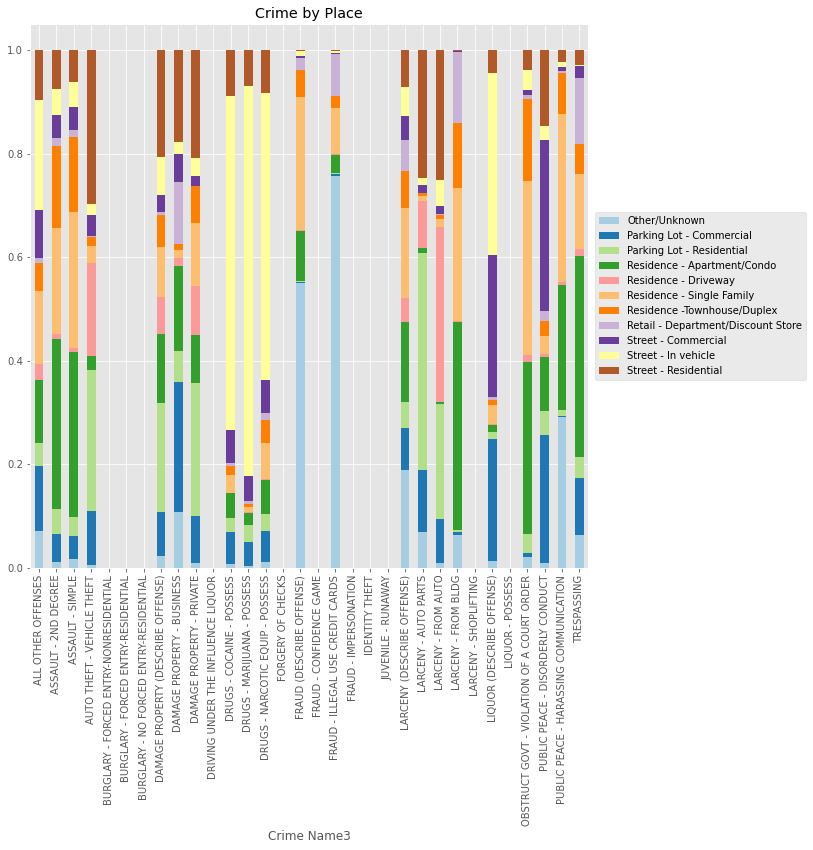

In [341]:
top_crimes = data_no_other['Crime Name3'].value_counts().loc[lambda x: x > 1000]
top_crimes_list = list(top_crimes.index.values)

top_places = data_no_other['Place'].value_counts().loc[lambda x: x > 5000]
top_places_list = list(top_places.index.values)

top_crimes_data = data_no_other[(data_no_other['Crime Name3'].isin(top_crimes_list)) & 
                                (data_no_other['Place'].isin(top_places_list))]

hs = top_crimes_data.groupby(['Crime Name3','Place'])['Place'].count()
hs = hs.unstack()

hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('Paired')
hs2.plot(kind='bar', stacked=True, title='Crime by Place',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.4,0.5))
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.plot()

[]

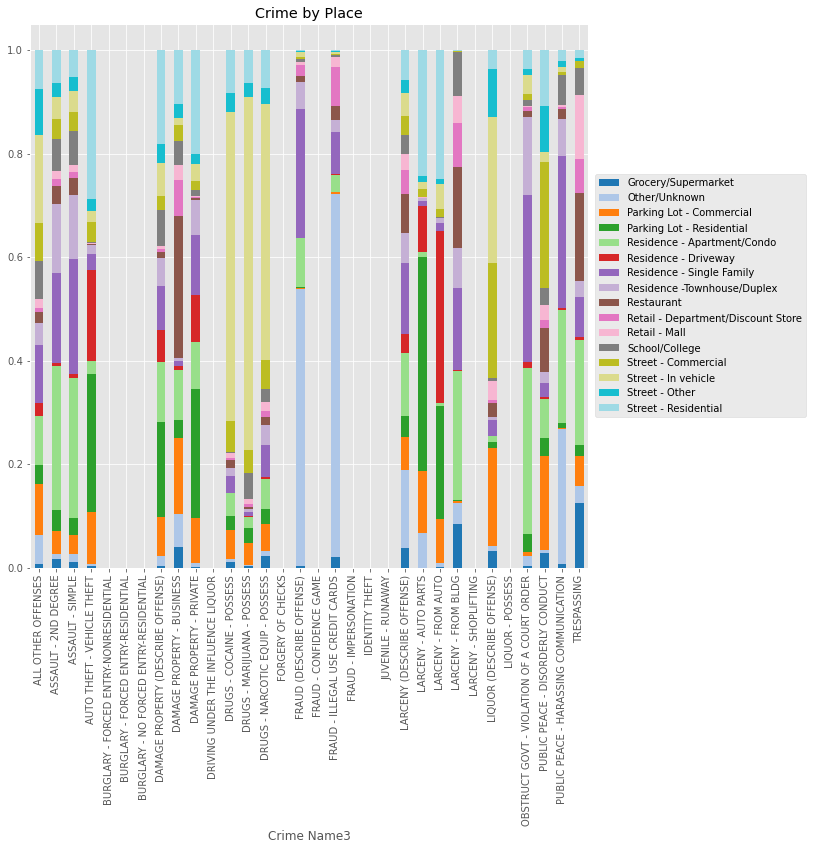

In [342]:
top_crimes = data_no_other['Crime Name3'].value_counts().loc[lambda x: x > 1000]
top_crimes_list = list(top_crimes.index.values)

top_places = data_no_other['Place'].value_counts().loc[lambda x: x > 3000]
top_places_list = list(top_places.index.values)

top_crimes_data = data_no_other[(data_no_other['Crime Name3'].isin(top_crimes_list)) & 
                                (data_no_other['Place'].isin(top_places_list))]

hs = top_crimes_data.groupby(['Crime Name3','Place'])['Place'].count()
hs = hs.unstack()

hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('tab20')
hs2.plot(kind='bar', stacked=True, title='Crime by Place',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.4,0.5))
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.plot()

[]

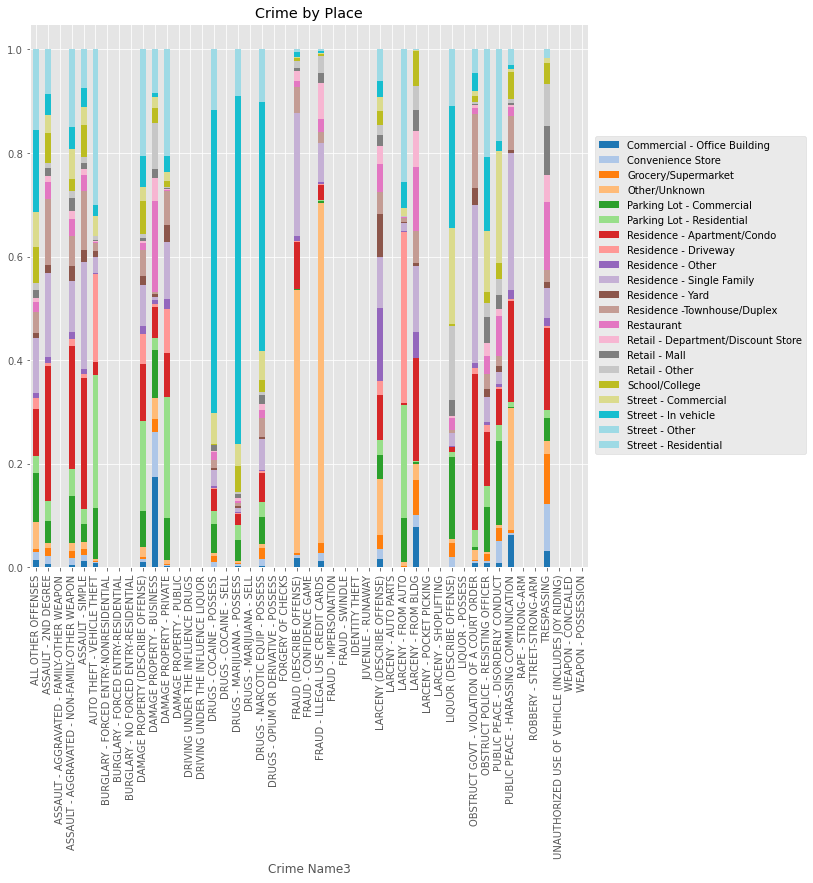

In [343]:
top_crimes = data_no_other['Crime Name3'].value_counts().loc[lambda x: x > 500]
top_crimes_list = list(top_crimes.index.values)

top_places = data_no_other['Place'].value_counts().loc[lambda x: x > 2000]
top_places_list = list(top_places.index.values)

top_crimes_data = data_no_other[(data_no_other['Crime Name3'].isin(top_crimes_list)) & 
                                (data_no_other['Place'].isin(top_places_list))]

hs = top_crimes_data.groupby(['Crime Name3','Place'])['Place'].count()
hs = hs.unstack()

hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('tab20')
hs2.plot(kind='bar', stacked=True, title='Crime by Place',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.4,0.5))
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.plot()

[]

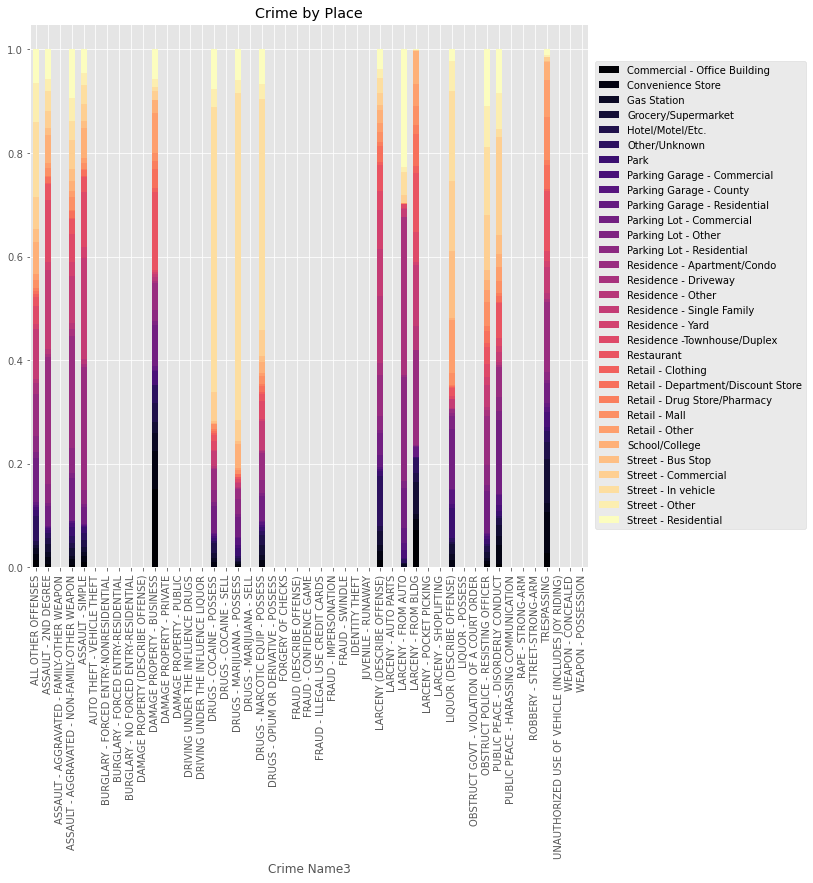

In [344]:
top_crimes = data_no_other['Crime Name3'].value_counts().loc[lambda x: x > 500]
top_crimes_list = list(top_crimes.index.values)

top_places = data_no_other['Place'].value_counts().loc[lambda x: x > 1000]
top_places_list = list(top_places.index.values)

top_crimes_data = data_no_other[(data_no_other['Crime Name3'].isin(top_crimes_list)) & 
                                (data_no_other['Place'].isin(top_places_list))]

hs = top_crimes_data.groupby(['Crime Name3','Place'])['Place'].count()
hs = hs.unstack()

hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('magma')
hs2.plot(kind='bar', stacked=True, title='Crime by Place',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.4,0.5))
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.plot()

In [339]:
crimes_district2 = crimes_districts.pivot(index = 'Police District Name', columns = 'Crime Name1', values = 'Count')
crimes_district2

Crime Name1           Crime Against Person  Crime Against Property  \
Police District Name                                                 
BETHESDA                            2108.0                 17624.0   
CITY OF TAKOMA PARK                  426.0                  2506.0   
GERMANTOWN                          3735.0                 13755.0   
MONTGOMERY VILLAGE                  4616.0                 16663.0   
OTHER                                  NaN                     1.0   
ROCKVILLE                           2498.0                 13041.0   
SILVER SPRING                       4284.0                 22096.0   
TAKOMA PARK                            NaN                     NaN   
WHEATON                             4237.0                 17983.0   

Crime Name1           Crime Against Society  Not a Crime   Other  
Police District Name                                              
BETHESDA                             5084.0        248.0  6851.0  
CITY OF TAKOMA PARK                  1119.0         63.0  1142.0  
GERMANTOWN                           6440.0        483.0  5673.0  
MONTGOMERY VILLAGE                   9877.0        609.0  8397.0  
OTHER                                   NaN          NaN     NaN  
ROCKVILLE                            7744.0        195.0  8738.0  
SILVER SPRING                       15069.0        445.0  8078.0  
TAKOMA PARK                             3.0          NaN     NaN  
WHEATON                             14101.0        774.0  8497.0

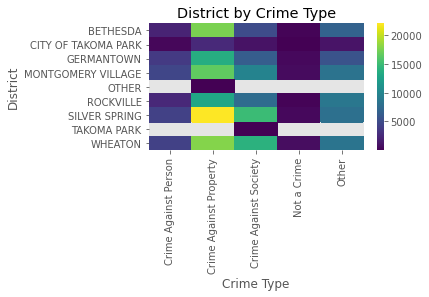

In [99]:
sns.heatmap(crimes_district2, cmap="viridis" ,fmt='g')
plt.tight_layout()
plt.title('District by Crime Type', y=1.1)
plt.ylabel('District')
plt.xlabel('Crime Type')
plt.show()

In [100]:
crimes_places2 = crimes_places.pivot(index = 'Place', columns = 'Crime Name1', values = 'Count')
crimes_places2

Crime Name1                   Crime Against Person  Crime Against Property  \
Place                                                                        
Air/Bus/Train/Metro Terminal                  75.0                   151.0   
Auto Dealership                               18.0                   505.0   
Auto Repair                                   20.0                   250.0   
Bank - ATM                                    24.0                   830.0   
Bank/S&L/Credit Union                         12.0                   697.0   
...                                            ...                     ...   
Street - In vehicle                          750.0                  2010.0   
Street - Other                               453.0                   980.0   
Street - Residential                        1075.0                  9508.0   
Theater                                        9.0                    68.0   
Wooded Area                                   56.0                    60.0   

Crime Name1                   Crime Against Society  Not a Crime   Other  
Place                                                                     
Air/Bus/Train/Metro Terminal                  132.0          NaN   221.0  
Auto Dealership                                59.0          NaN   192.0  
Auto Repair                                    10.0          NaN    43.0  
Bank - ATM                                     43.0          NaN    90.0  
Bank/S&L/Credit Union                          28.0          NaN    66.0  
...                                             ...          ...     ...  
Street - In vehicle                         24486.0          5.0  1376.0  
Street - Other                               2061.0          9.0  1185.0  
Street - Residential                         3221.0         11.0  1914.0  
Theater                                        28.0          1.0    42.0  
Wooded Area                                   104.0          NaN   164.0  

[83 rows x 5 columns]

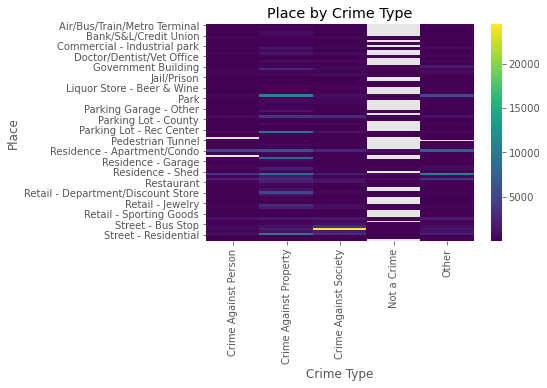

In [101]:
sns.heatmap(crimes_places2, cmap = 'viridis', fmt='g')
plt.title('Place by Crime Type', y=1.1)
plt.ylabel('Place')
plt.xlabel('Crime Type')
plt.show()

In [102]:
crime_crime = dataframe5.groupby(['Crime Name1','Crime Name2']).size().reset_index(name='Count')
crime_crime.head()

Crime Name1         Crime Name2  Count
0  Crime Against Person  Aggravated Assault   3037
1  Crime Against Person  All Other Offenses    103
2  Crime Against Person            Fondling    740
3  Crime Against Person   Forcible Fondling    355
4  Crime Against Person       Forcible Rape    972

Text(0.5, 1.0, 'Specific Crime Type by General Crime Type')

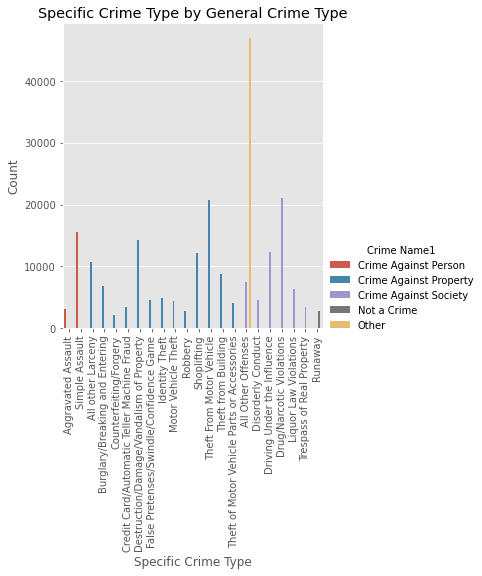

In [103]:
crime_crime_sub = crime_crime[crime_crime['Count']>2000]
sns.catplot(x='Crime Name2', y = 'Count', hue='Crime Name1', kind = 'bar', data = crime_crime_sub)
plt.xlabel('Specific Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Specific Crime Type by General Crime Type')

Text(0.5, 1.0, 'General Crimes by Specific Crime Type')

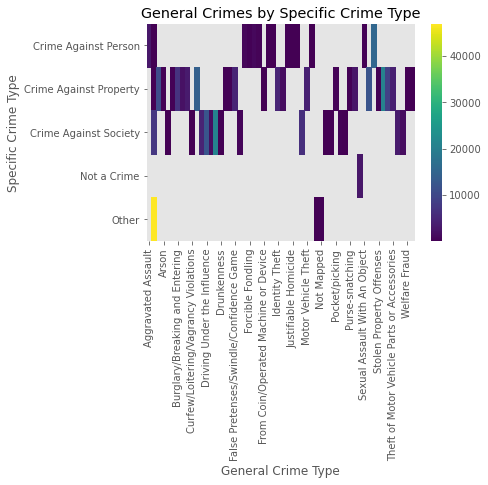

In [104]:
crime_crime2 = crime_crime.pivot(index = 'Crime Name1', columns = 'Crime Name2', values = 'Count')

sns.heatmap(crime_crime2, cmap = 'viridis', fmt = 'g')
plt.xlabel('General Crime Type')
plt.ylabel('Specific Crime Type')
plt.title('General Crimes by Specific Crime Type')

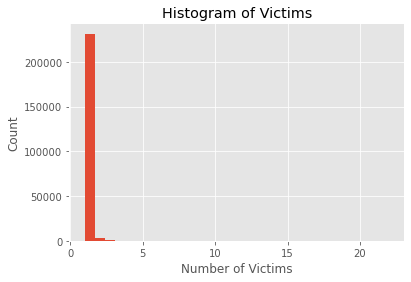

In [105]:
vics = dataframe5.Victims
plt.hist(vics,bins=30)

plt.title('Histogram of Victims')
plt.ylabel('Count')
plt.xlabel('Number of Victims')
plt.show()

### Analysis of Census Dataset Variables

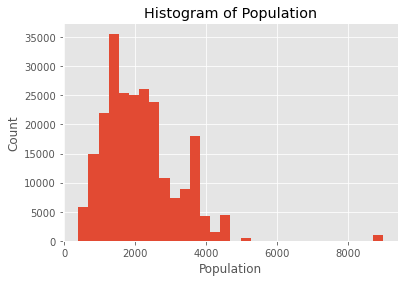

In [106]:
pop = dataframe5.Pop
plt.hist(pop, bins=30)

plt.title('Histogram of Population')
plt.ylabel('Count')
plt.xlabel('Population')

plt.show()

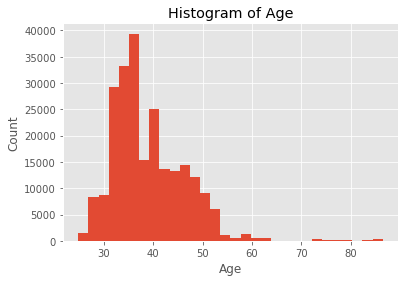

In [107]:
age = dataframe5.Age
plt.hist(age, bins=30)

plt.title('Histogram of Age')
plt.ylabel('Count')
plt.xlabel('Age')

plt.show()

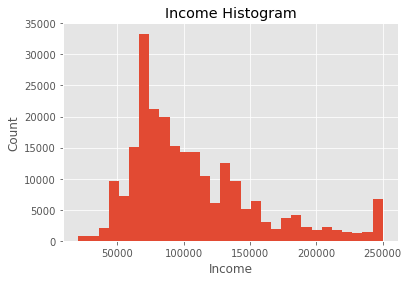

In [108]:
# Histogram of income
income = dataframe5.Income
plt.hist(income, bins = 30)

plt.title('Income Histogram')
plt.ylabel('Count')
plt.xlabel('Income')


plt.show()

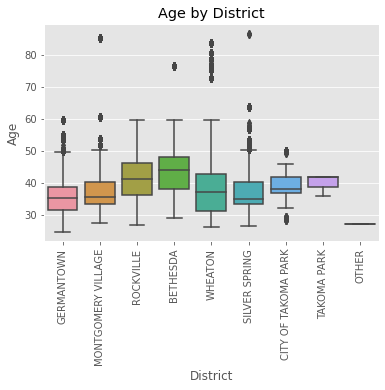

In [109]:
age_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Age')

plt.title('Age by District')
plt.ylabel('Age')
plt.xlabel('District')
plt.xticks(rotation=90)

plt.show()

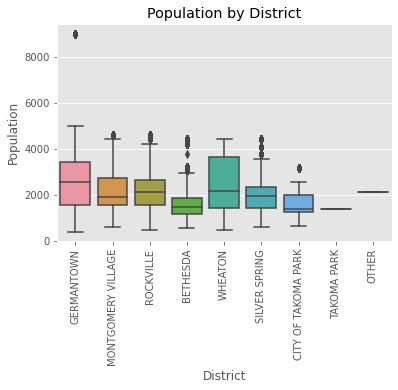

In [110]:
pop_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Pop')

plt.title('Population by District')
plt.ylabel('Population')
plt.xlabel('District')
plt.xticks(rotation=90)

plt.show()

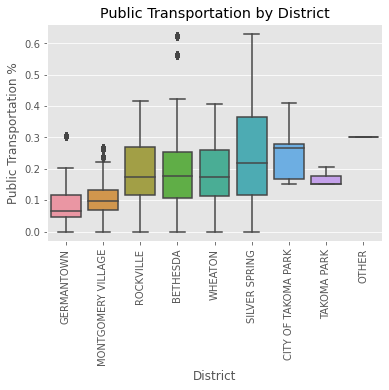

In [111]:
trans_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Public Transportation %')

plt.title('Public Transportation by District')
plt.ylabel('Public Transportation %')
plt.xlabel('District')
plt.xticks(rotation=90)

plt.show()

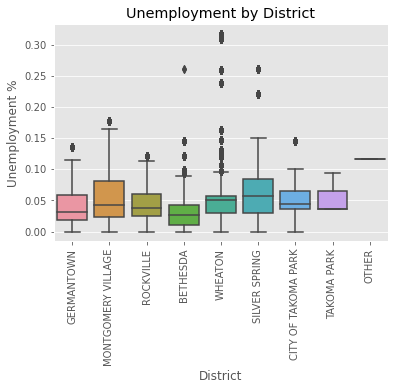

In [112]:
unemp_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Unemployed %')

plt.title('Unemployment by District')
plt.ylabel('Unemployment %')
plt.xlabel('District')
plt.xticks(rotation=90)

plt.show()

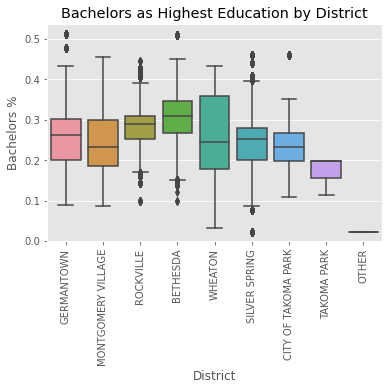

In [113]:
edu_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Bachelors %')

plt.title('Bachelors as Highest Education by District')
plt.ylabel('Bachelors %')
plt.xlabel('District')
plt.xticks(rotation=90)

plt.show()

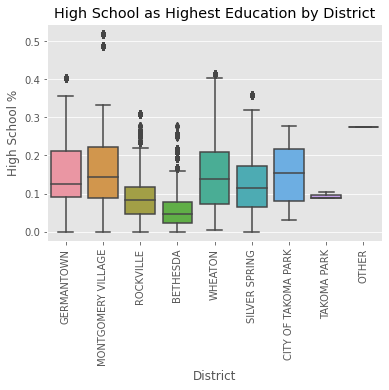

In [114]:
edu_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'High School %')

plt.title('High School as Highest Education by District')
plt.ylabel('High School %')
plt.xlabel('District')
plt.xticks(rotation=90)

plt.show()

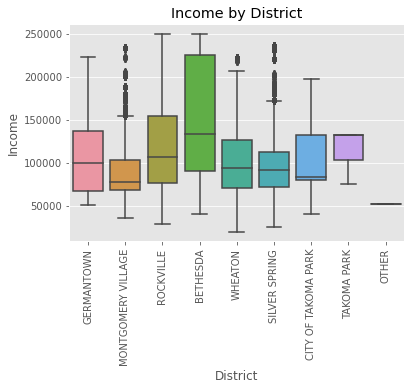

In [115]:
# Side-by-Side Boxplot of Income by Crime Type

income_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Income')

plt.title('Income by District')
plt.ylabel('Income')
plt.xlabel('District')
plt.xticks(rotation=90)

plt.show()

### Analysis of Census Data and Crimes Data

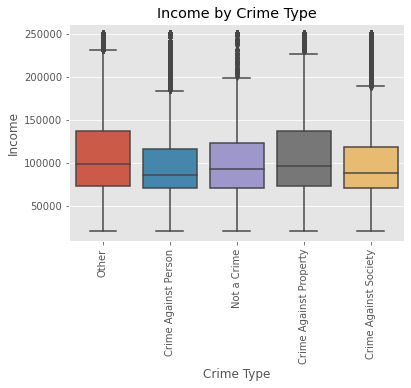

In [116]:
# Side-by-Side Boxplot of Income by Crime Type

income_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Income')

plt.title('Income by Crime Type')
plt.ylabel('Income')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)

plt.show()

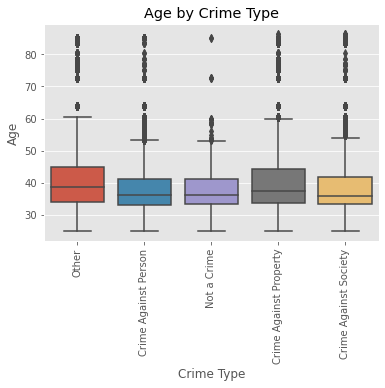

In [117]:
# Side-by-Side Boxplot of Age by Crime Type

age_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Age')

plt.title('Age by Crime Type')
plt.ylabel('Age')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)

plt.show()

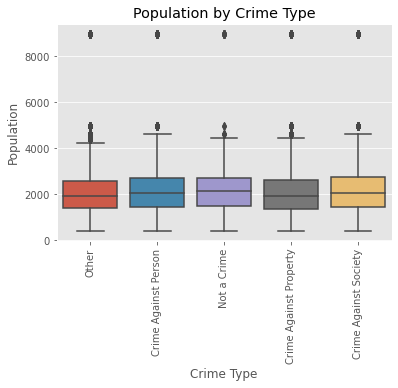

In [118]:
# Side-by-Side Boxplot of  by Crime Type

pop_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Pop')

plt.title('Population by Crime Type')
plt.ylabel('Population')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)

plt.show()

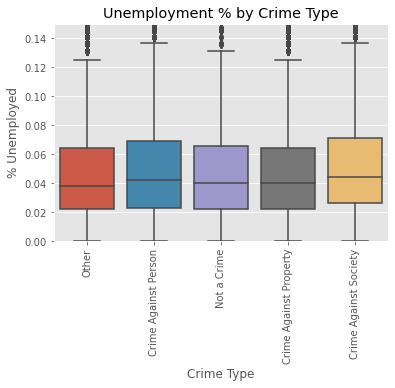

In [119]:
# Side-by-Side Boxplot of  by Crime Type

unemp = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Unemployed %')

plt.title('Unemployment % by Crime Type')
plt.ylabel('% Unemployed')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
unemp.set_ylim([0,0.15])

plt.show()

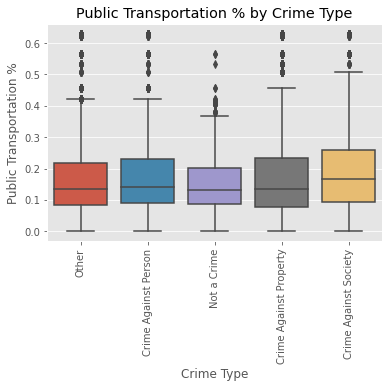

In [120]:
transp = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Public Transportation %')

plt.title('Public Transportation % by Crime Type')
plt.ylabel('Public Transportation %')
plt.xlabel('Crime Type')
plt.xticks(rotation = 90)

plt.show()

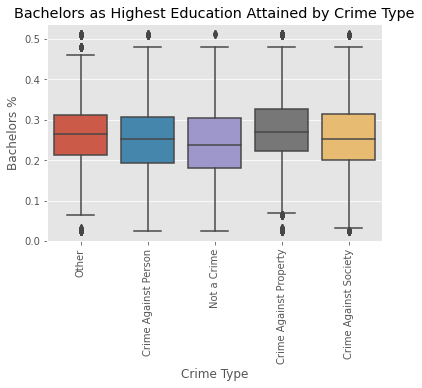

In [121]:
bach = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Bachelors %')

plt.title('Bachelors as Highest Education Attained by Crime Type')
plt.ylabel('Bachelors %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)

plt.show()

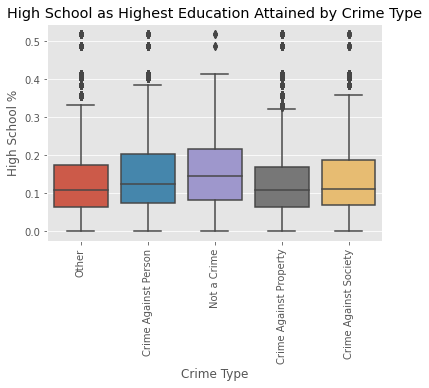

In [122]:
high_school = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'High School %')

plt.title('High School as Highest Education Attained by Crime Type')
plt.ylabel('High School %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)

plt.show()

In [123]:
crime_sub = dataframe5[dataframe5.groupby('Crime Name2').Place.transform("size") >= 2000]
crime_sub.head()

Incident ID          City Police District Name    Block  Crime Name1  \
50    201268391  GAITHERSBURG           GERMANTOWN  7001011        Other   
52    201281727  GAITHERSBURG   MONTGOMERY VILLAGE  7001011        Other   
53    201265326  GAITHERSBURG   MONTGOMERY VILLAGE  7001011        Other   
54    201090622  GAITHERSBURG           GERMANTOWN  7001011        Other   
55    201090925  GAITHERSBURG   MONTGOMERY VILLAGE  7001011  Not a Crime   

           Crime Name2         Crime Name3  Victims  \
50  All Other Offenses  POLICE INFORMATION        1   
52  All Other Offenses  POLICE INFORMATION        1   
53  All Other Offenses  POLICE INFORMATION        1   
54  All Other Offenses  POLICE INFORMATION        1   
55             Runaway  JUVENILE - RUNAWAY        1   

                        Place     Pop  ...  Total Laborforce  \
50  Residence - Single Family  1922.0  ...            1067.0   
52           Residence - Yard  1922.0  ...            1067.0   
53  Residence - Single Family  1922.0  ...            1067.0   
54             Street - Other  1922.0  ...            1067.0   
55    Church/Synagogue/Temple  1922.0  ...            1067.0   

    Total Unemployed         Start_Date_Time             Location  Longitude  \
50              31.0  12/06/2019 09:16:00 PM  (39.2006, -77.1996) -77.199620   
52              31.0  03/13/2020 09:09:00 AM  (39.2081, -77.1748) -77.174806   
53              31.0  11/15/2019 04:33:00 PM  (39.2025, -77.1848) -77.184766   
54              31.0  07/22/2016 10:27:00 PM   (39.205, -77.1643) -77.164342   
55              31.0  07/26/2016 10:00:00 AM   (39.1948, -77.185) -77.184983   

     Latitude  High School %  Bachelors %  Public Transportation %  \
50  39.200626       0.083714     0.270167                 0.049515   
52  39.208137       0.083714     0.270167                 0.049515   
53  39.202456       0.083714     0.270167                 0.049515   
54  39.204973       0.083714     0.270167                 0.049515   
55  39.194792       0.083714     0.270167                 0.049515   

   Unemployed %  
50     0.029053  
52     0.029053  
53     0.029053  
54     0.029053  
55     0.029053  

[5 rows x 27 columns]

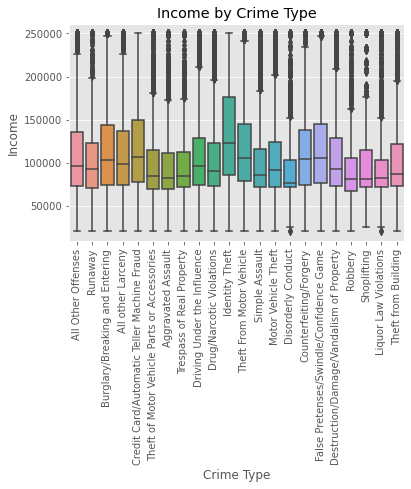

In [124]:
# Side-by-Side Boxplot of Income by Crime Type

income_crime2 = sns.boxplot(data = crime_sub,
                 x = 'Crime Name2',
                 y = 'Income')

plt.title('Income by Crime Type')
plt.ylabel('Income')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)

plt.show()

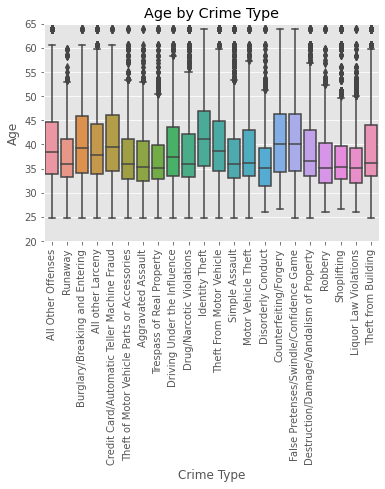

In [125]:
# Side-by-Side Boxplot of Age by Crime Type

age_crime2 = sns.boxplot(data = crime_sub,
                 x = 'Crime Name2',
                 y = 'Age')

plt.title('Age by Crime Type')
plt.ylabel('Age')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
age_crime2.set_ylim([20,65])

plt.show()

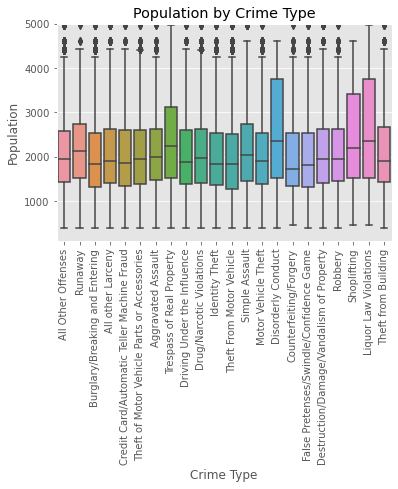

In [126]:
# Side-by-Side Boxplot of  by Crime Type

pop_crime2 = sns.boxplot(data = crime_sub,
                 x = 'Crime Name2',
                 y = 'Pop')

plt.title('Population by Crime Type')
plt.ylabel('Population')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
pop_crime2.set_ylim([100,5000])

plt.show()

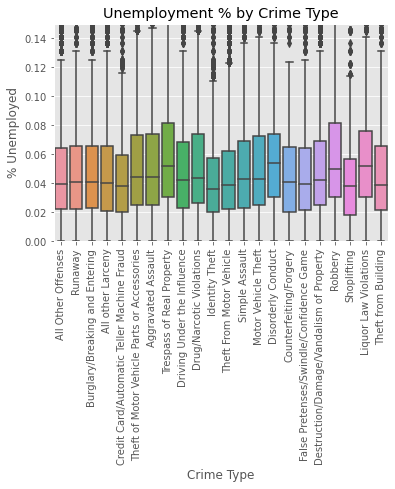

In [127]:
# Side-by-Side Boxplot of  by Crime Type

unemp2 = sns.boxplot(data = crime_sub,
                 x = 'Crime Name2',
                 y = 'Unemployed %')

plt.title('Unemployment % by Crime Type')
plt.ylabel('% Unemployed')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
unemp2.set_ylim([0,0.15])

plt.show()

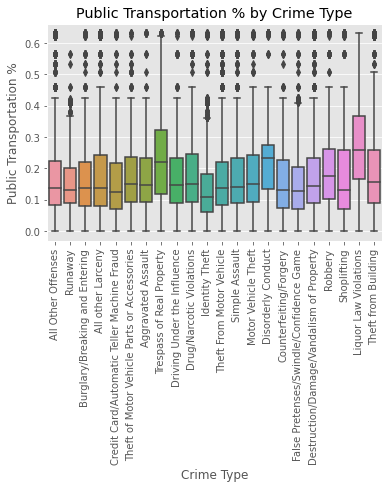

In [128]:
transp2 = sns.boxplot(data = crime_sub,
                 x = 'Crime Name2',
                 y = 'Public Transportation %')

plt.title('Public Transportation % by Crime Type')
plt.ylabel('Public Transportation %')
plt.xlabel('Crime Type')
plt.xticks(rotation = 90)

plt.show()

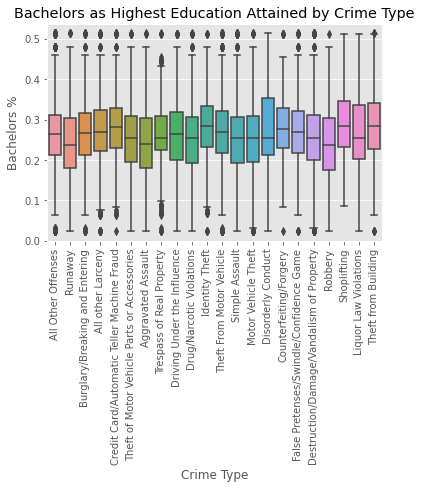

In [129]:
bach2 = sns.boxplot(data = crime_sub,
                 x = 'Crime Name2',
                 y = 'Bachelors %')

plt.title('Bachelors as Highest Education Attained by Crime Type')
plt.ylabel('Bachelors %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)

plt.show()

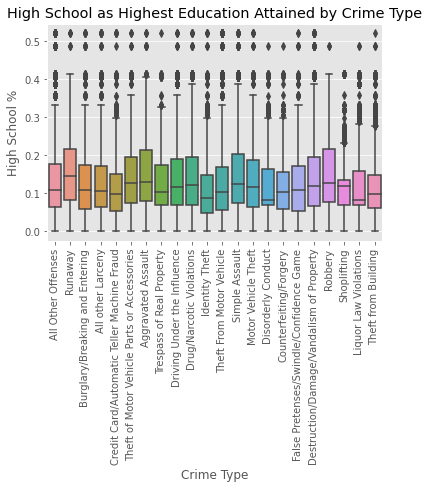

In [130]:
hs2 = sns.boxplot(data = crime_sub,
                 x = 'Crime Name2',
                 y = 'High School %')

plt.title('High School as Highest Education Attained by Crime Type')
plt.ylabel('High School %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)

plt.show()

In [131]:
places_sub = dataframe5[dataframe5.groupby('Place').Place.transform("size") >= 3000]
places_sub.head()

Incident ID          City Police District Name    Block  \
50    201268391  GAITHERSBURG           GERMANTOWN  7001011   
51    201234989  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
53    201265326  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
54    201090622  GAITHERSBURG           GERMANTOWN  7001011   
57    201289578  GAITHERSBURG           GERMANTOWN  7001012   

             Crime Name1         Crime Name2             Crime Name3  Victims  \
50                 Other  All Other Offenses      POLICE INFORMATION        1   
51  Crime Against Person            Fondling  SEX OFFENSE - FONDLING        1   
53                 Other  All Other Offenses      POLICE INFORMATION        1   
54                 Other  All Other Offenses      POLICE INFORMATION        1   
57                 Other  All Other Offenses                OVERDOSE        1   

                        Place     Pop  ...  Total Laborforce  \
50  Residence - Single Family  1922.0  ...            1067.0   
51  Residence - Single Family  1922.0  ...            1067.0   
53  Residence - Single Family  1922.0  ...            1067.0   
54             Street - Other  1922.0  ...            1067.0   
57       Street - Residential  1931.0  ...            1105.0   

    Total Unemployed         Start_Date_Time             Location  Longitude  \
50              31.0  12/06/2019 09:16:00 PM  (39.2006, -77.1996) -77.199620   
51              31.0  04/13/2019 02:00:00 AM  (39.1977, -77.1997) -77.199669   
53              31.0  11/15/2019 04:33:00 PM  (39.2025, -77.1848) -77.184766   
54              31.0  07/22/2016 10:27:00 PM   (39.205, -77.1643) -77.164342   
57              54.0  05/29/2020 08:14:00 PM   (39.2148, -77.195) -77.195000   

     Latitude  High School %  Bachelors %  Public Transportation %  \
50  39.200626       0.083714     0.270167                 0.049515   
51  39.197675       0.083714     0.270167                 0.049515   
53  39.202456       0.083714     0.270167                 0.049515   
54  39.204973       0.083714     0.270167                 0.049515   
57  39.214783       0.160633     0.313725                 0.065817   

   Unemployed %  
50     0.029053  
51     0.029053  
53     0.029053  
54     0.029053  
57     0.048869  

[5 rows x 27 columns]

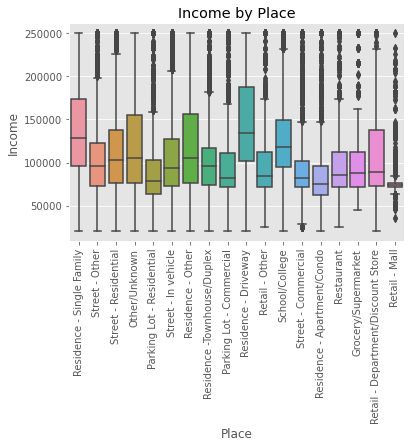

In [132]:
# Side-by-Side Boxplot of Income by Crime Type

income_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Income')

plt.title('Income by Place')
plt.ylabel('Income')
plt.xlabel('Place')
plt.xticks(rotation=90)

plt.show()

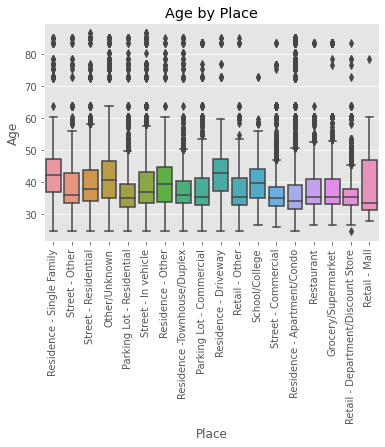

In [133]:
age_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Age')

plt.title('Age by Place')
plt.ylabel('Age')
plt.xlabel('Place')
plt.xticks(rotation=90)

plt.show()

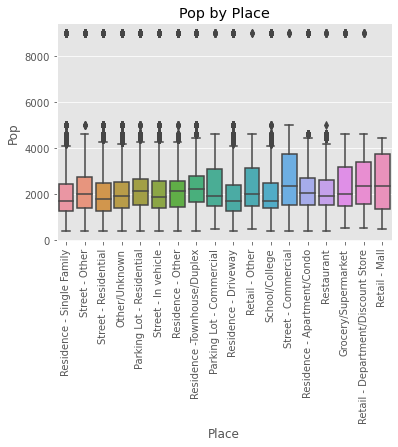

In [134]:
pop_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Pop')

plt.title('Pop by Place')
plt.ylabel('Pop')
plt.xlabel('Place')
plt.xticks(rotation=90)

plt.show()

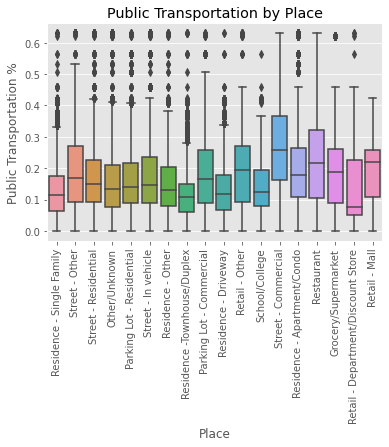

In [135]:
transp_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Public Transportation %')

plt.title('Public Transportation by Place')
plt.ylabel('Public Transportation %')
plt.xlabel('Place')
plt.xticks(rotation=90)

plt.show()

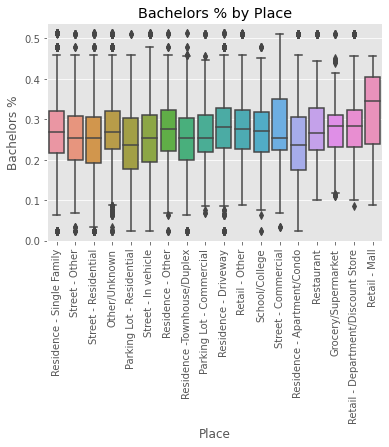

In [136]:
bach_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Bachelors %')

plt.title('Bachelors % by Place')
plt.ylabel('Bachelors %')
plt.xlabel('Place')
plt.xticks(rotation=90)

plt.show()

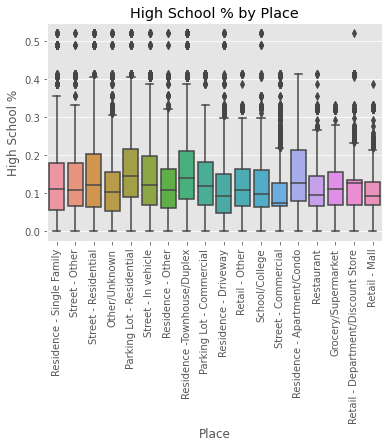

In [137]:
hs_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'High School %')

plt.title('High School % by Place')
plt.ylabel('High School %')
plt.xlabel('Place')
plt.xticks(rotation=90)

plt.show()

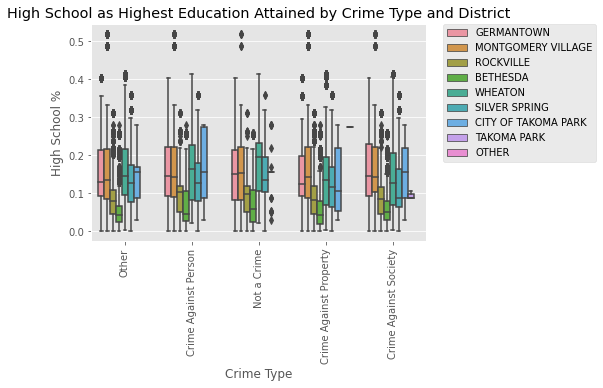

In [138]:
high_school_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1', 
                 hue = 'Police District Name',
                 y = 'High School %')

plt.title('High School as Highest Education Attained by Crime Type and District')
plt.ylabel('High School %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

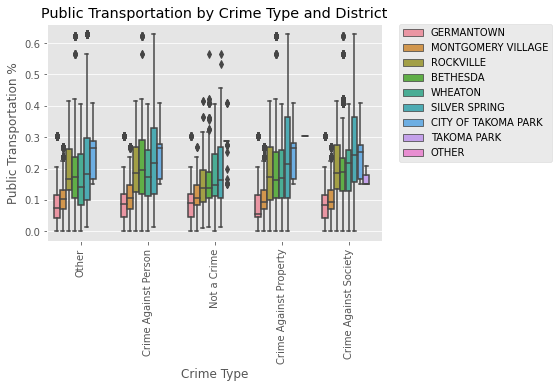

In [139]:
transp_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1', 
                 hue = 'Police District Name',
                 y = 'Public Transportation %')

plt.title('Public Transportation by Crime Type and District')
plt.ylabel('Public Transportation %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

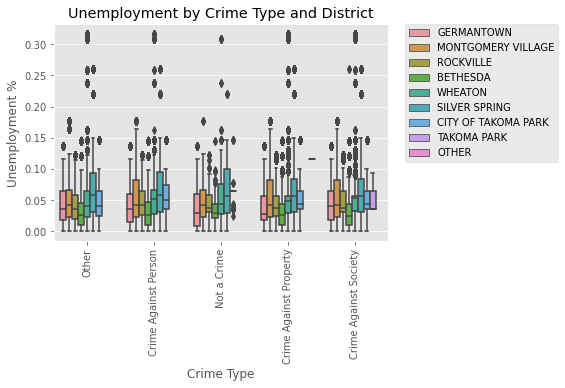

In [140]:
unemp_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1', 
                 hue = 'Police District Name',
                 y = 'Unemployed %')

plt.title('Unemployment by Crime Type and District')
plt.ylabel('Unemployment %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

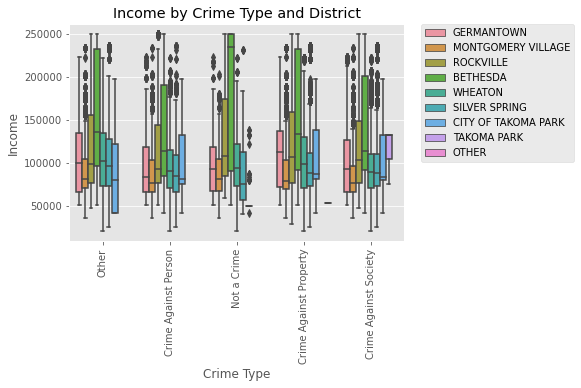

In [141]:
income_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1', 
                 hue = 'Police District Name',
                 y = 'Income')

plt.title('Income by Crime Type and District')
plt.ylabel('Income')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

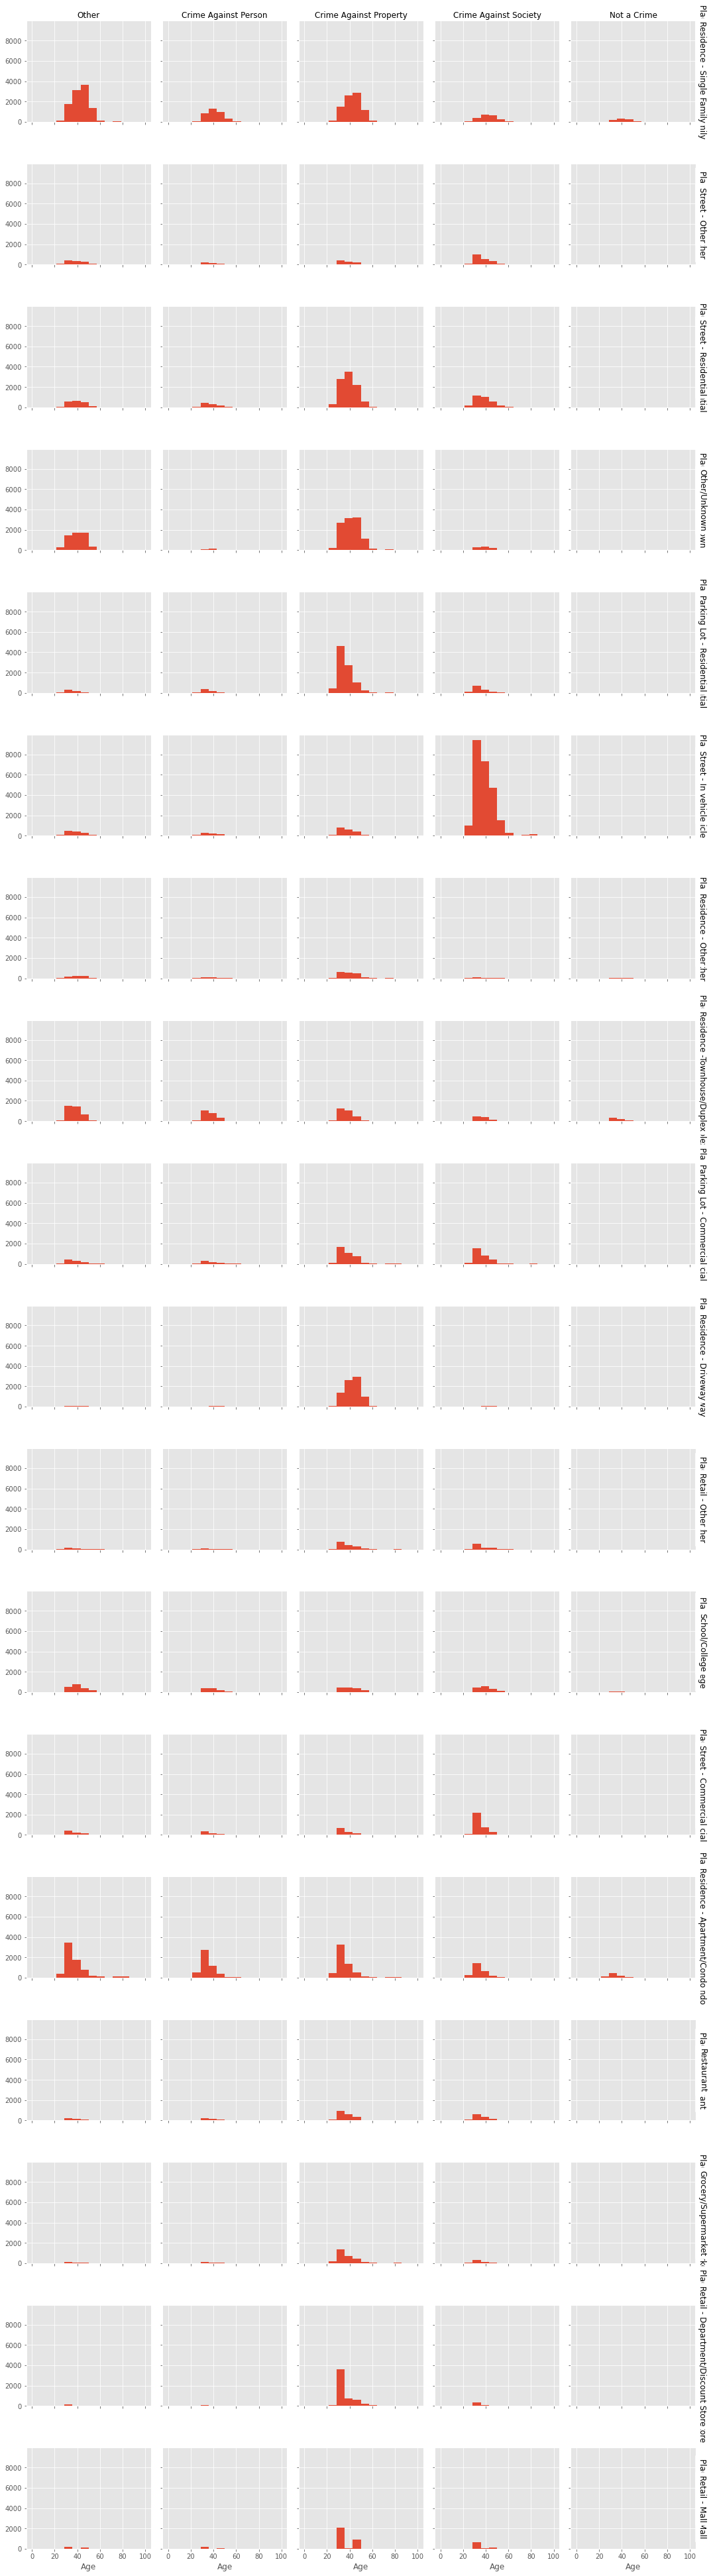

In [142]:
grid2 = sns.FacetGrid(places_sub, row='Place', col='Crime Name1',margin_titles=True)
grid2.map(plt.hist, 'Age', bins = np.linspace(0,100,15))
grid2.set_titles(col_template = '{col_name}', row_template = '{row_name}')
plt.tight_layout()


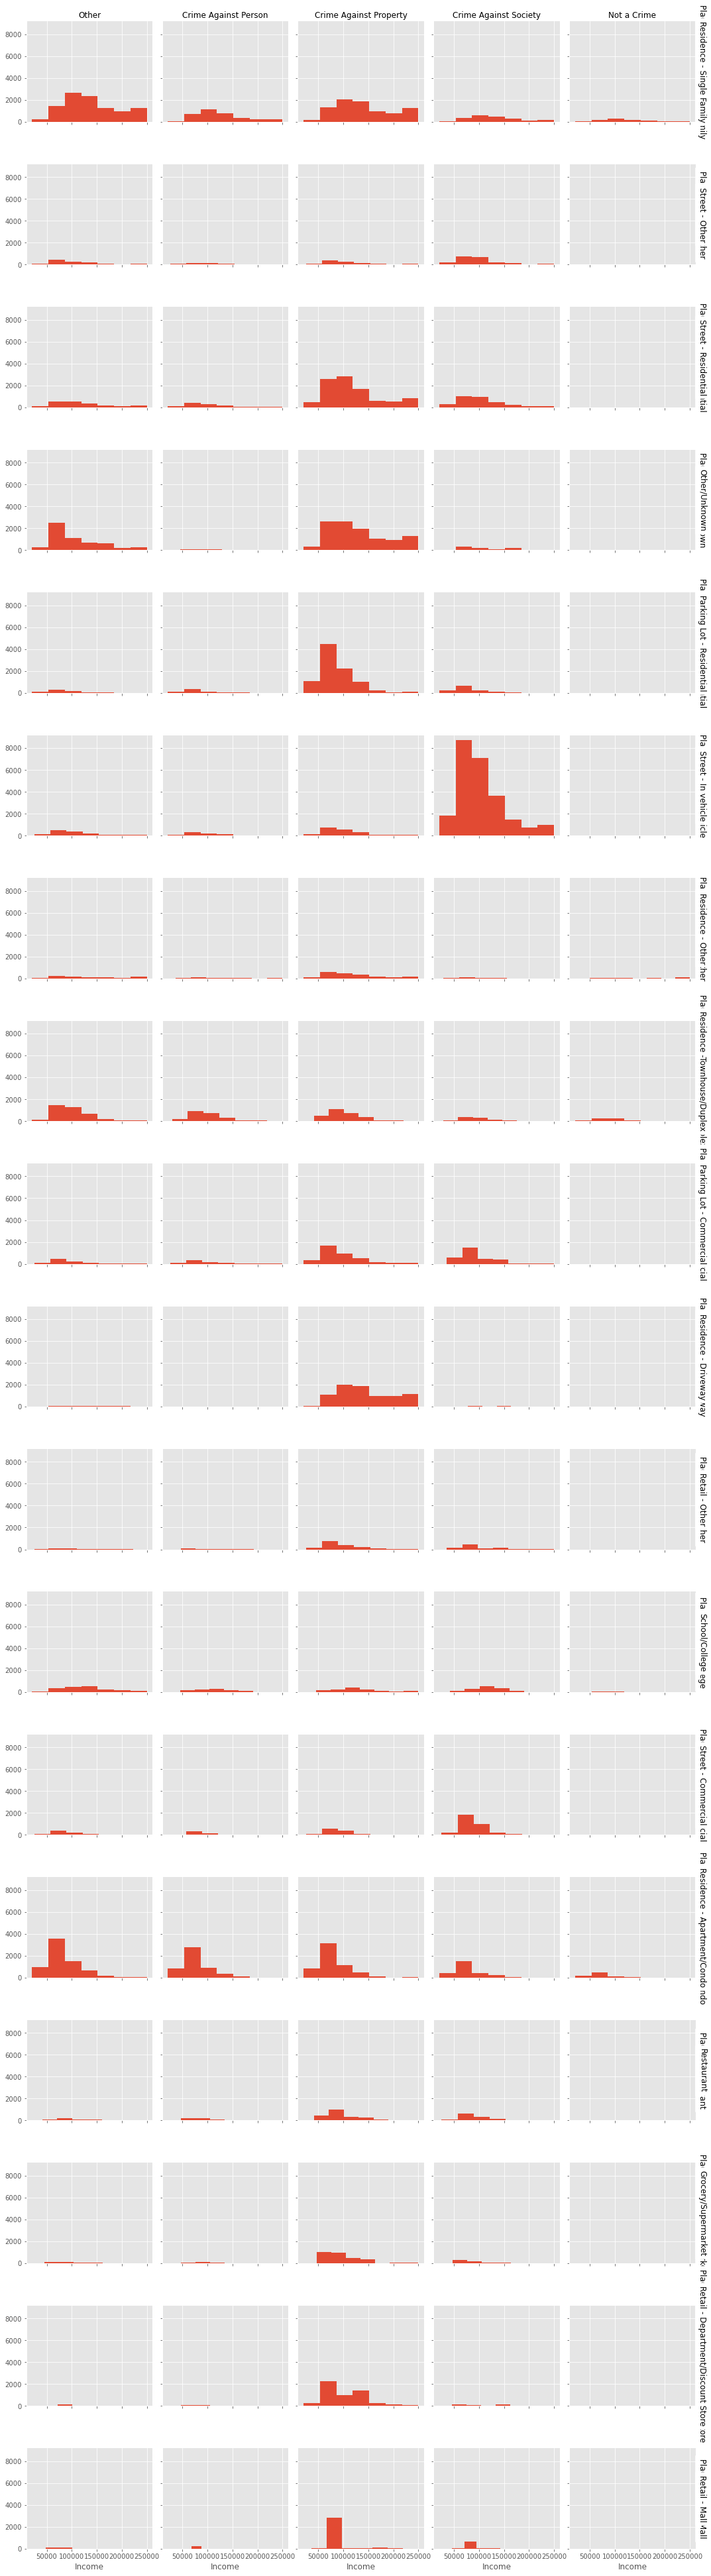

In [143]:
grid2 = sns.FacetGrid(places_sub, row='Place', col='Crime Name1',margin_titles=True)
grid2.map(plt.hist, 'Income', bins=7)
grid2.set_titles(col_template = '{col_name}', row_template = '{row_name}')
plt.tight_layout()

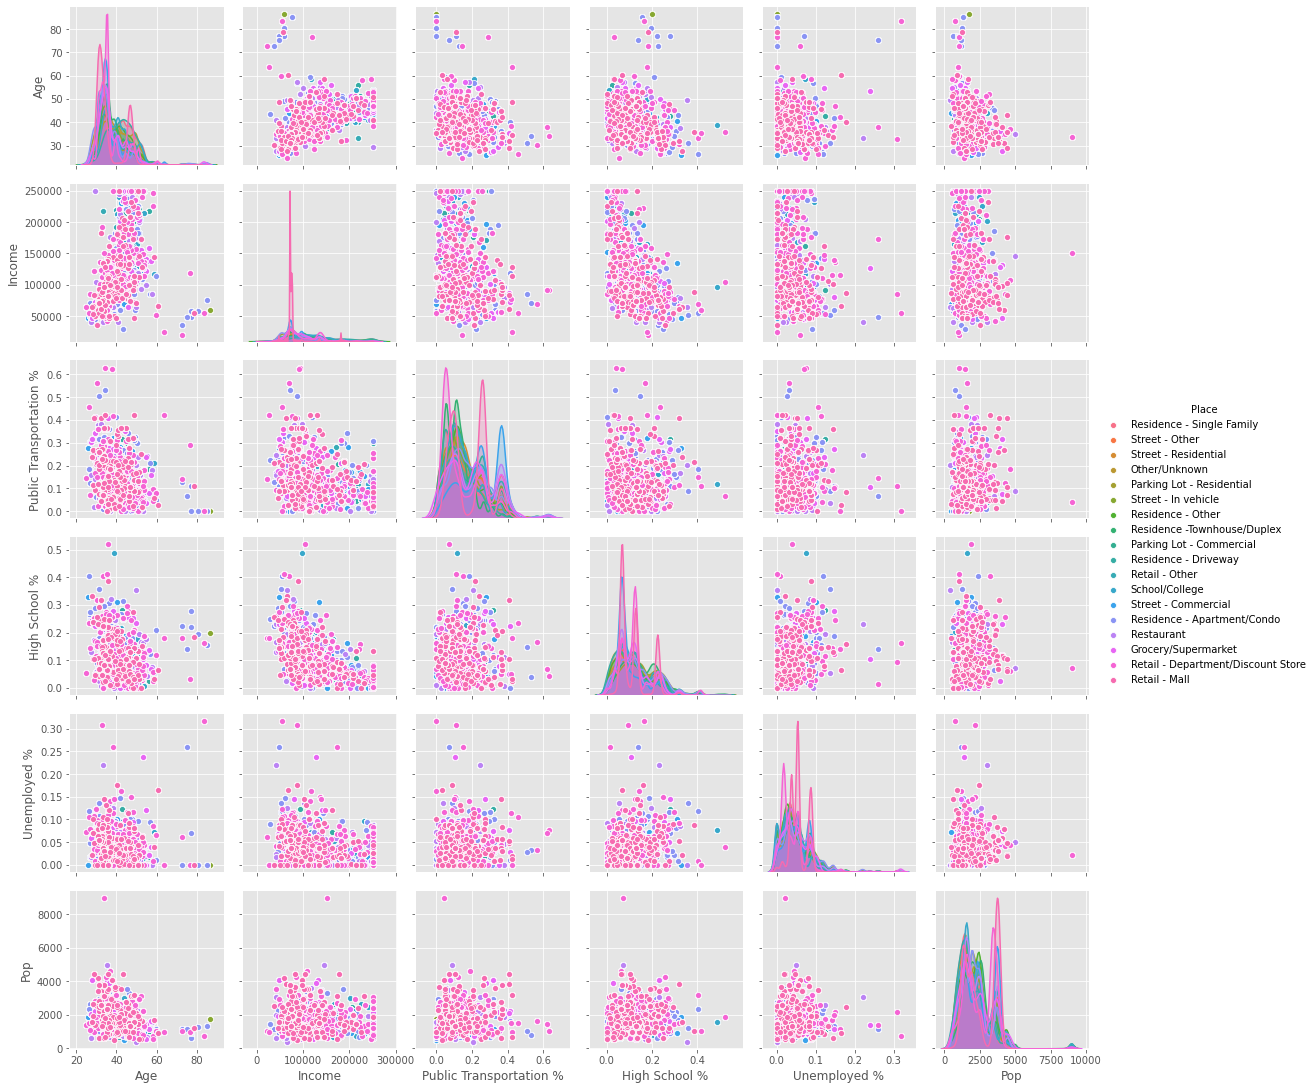

In [144]:
sns.pairplot(places_sub, vars = ['Age','Income','Public Transportation %','High School %','Unemployed %','Pop'], hue='Place')


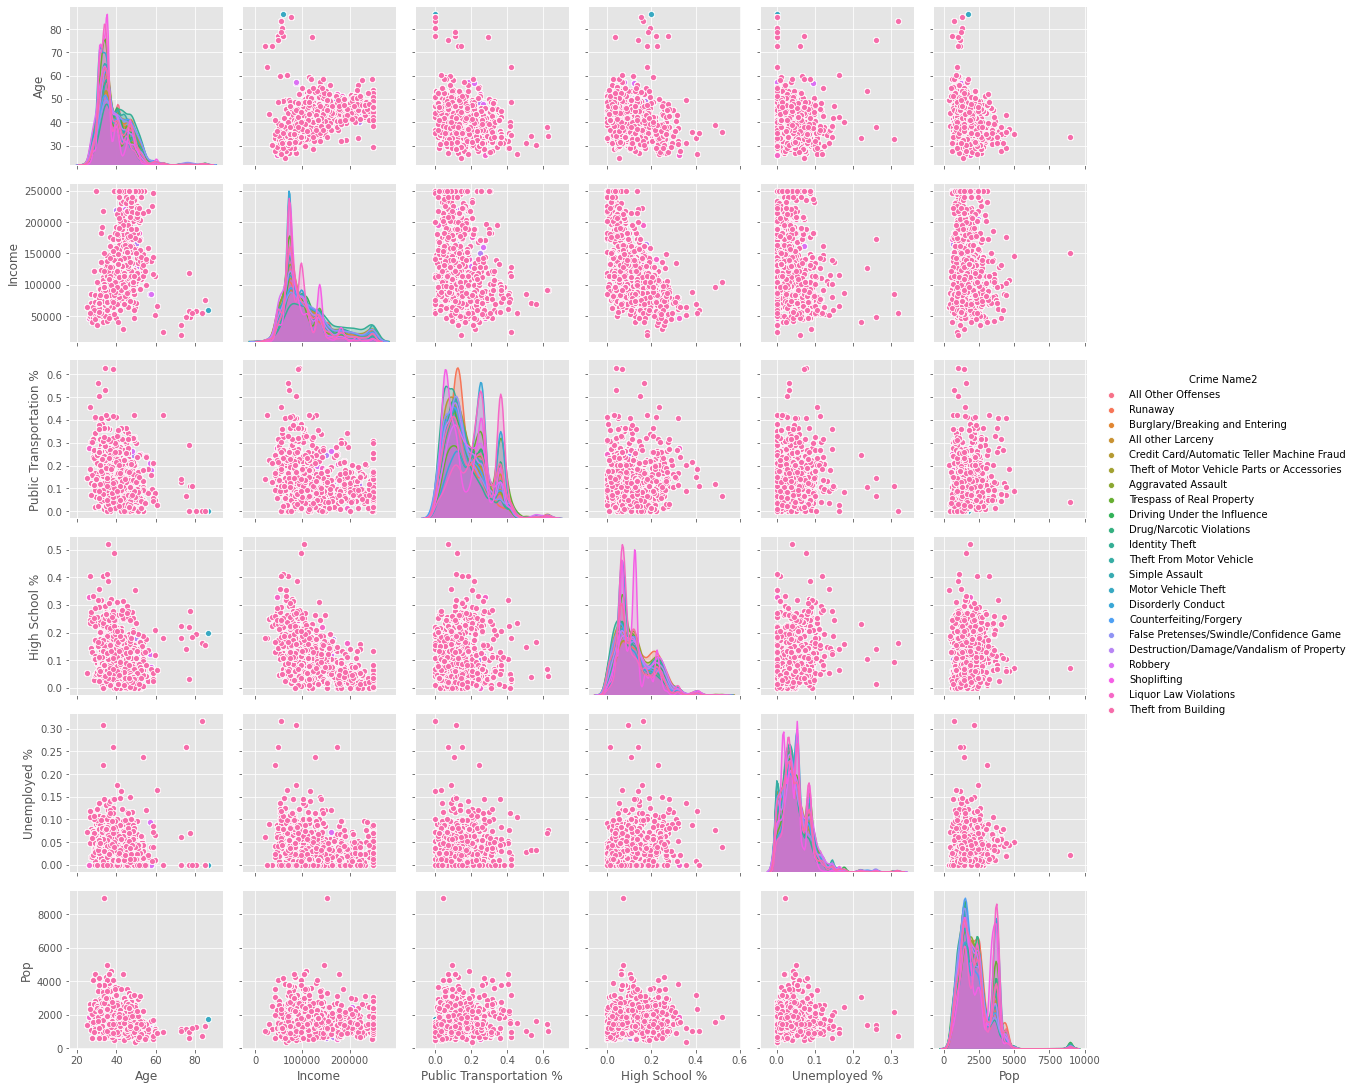

In [145]:
sns.pairplot(crime_sub, vars = ['Age','Income','Public Transportation %','High School %','Unemployed %','Pop'], hue='Crime Name2')


In [146]:
crime_data = pd.DataFrame(dataframe5['Crime Name3'].value_counts())
crime_data.head(20)

Crime Name3
LARCENY - FROM AUTO                        20699
DRUGS - MARIJUANA - POSSESS                14408
POLICE INFORMATION                         13417
ASSAULT - 2ND DEGREE                       12724
LARCENY - SHOPLIFTING                      12145
DRIVING UNDER THE INFLUENCE LIQUOR         11747
LARCENY (DESCRIBE OFFENSE)                  9687
DAMAGE PROPERTY - PRIVATE                   9123
MENTAL ILLNESS - EMERGENCY PETITION         8595
LARCENY - FROM BLDG                         8310
LOST PROPERTY                               8237
IDENTITY THEFT                              4896
SUDDEN DEATH                                4417
LIQUOR - POSSESS                            4411
PUBLIC PEACE - DISORDERLY CONDUCT           4318
AUTO THEFT - VEHICLE THEFT                  4149
LARCENY - AUTO PARTS                        4056
MISSING PERSON                              3589
TRESPASSING                                 3378
FRAUD - ILLEGAL USE CREDIT CARDS            3358

In [147]:
dataframe5.to_csv('Crime_Clean.csv')